# 오프라인_초급_취업 6조 팀 프로젝트_데이터 분석 - 공통적으로 처리한 데이터로 진행한 개인 및 팀 단위의 데이터 분석, 시계화



* 이전의 공통적인 데이터 전처리에 대한 내용은 [\[offline6_FC_EDA\]Total code_common.ipynb](https://colab.research.google.com/drive/1gr4WfndLA-0bXlJ98m0qvY3P3EEDfMF1)으로 이동하여 확인해주시길 바랍니다. 현재 해당 ipnyb 파일은 팀에서 공통적으로 raw data를 전처리한 이후 팀에서 공통으로 사용하는 Teamraw.xlsx 기반으로 진행됩니다.

# 데이터 분석 전 기본적인 환경 setting

## 기본적인 공통 setting

In [ ]:
# 한글깨짐 방지 - 해당 가장 먼저 실행 후 Restart and run all 
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 42 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (9,527 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletyp

In [ ]:
# google drive mount
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# 필요모듈 import

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# For google colab memory issue
pd.set_option('mode.chained_assignment',  None)

In [ ]:
# 폰트 나눔바른고딕 지정
plt.rc('font', family='NanumBarunGothic') 

In [ ]:
# 데이터 프레임 화 - 정리한 Teamraw 엑셀로 개인 및 팀별 분석
path = '/content/drive/MyDrive/'
df = pd.read_excel(path+'Teamraw.xlsx')
# 경로는 개인의 환경에 맞게 수정 처리

In [ ]:
#raw data를 정리한 엑셀을 다시 불러올 경우 Unnamed: 0 이라는 column 생성된 것을 확인하여 drop 처리.
df = df.drop(['Unnamed: 0'], axis=1)

KeyError: ignored

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97543 entries, 0 to 97542
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   id                      97543 non-null  int64         
 1   customer_id             97543 non-null  int64         
 2   course_id               93304 non-null  float64       
 3   type                    97543 non-null  object        
 4   state                   97543 non-null  object        
 5   course_title            97543 non-null  object        
 6   category_title          97543 non-null  object        
 7   format                  97543 non-null  object        
 8   completed_at            97543 non-null  datetime64[ns]
 9   transaction_amount      97543 non-null  int64         
 10  coupon_title            97543 non-null  object        
 11  coupon_discount_amount  97543 non-null  int64         
 12  sale_price              97543 non-null  int64 

In [ ]:
# 마케팅 팀은 mk / 손실분석 팀은 rs 로 해당의 데이터프레임 df 에서 복사하여 서로 분석하는 동안 데이터 충돌이 일지 않도록 처리.
# 또한 개인에 따라 mk1, mk2, mk3 등으로 따로 분리.
mk = df.copy()
rs = df.copy()

# 마케팅 

## 가설

- 마케팅은 주 고객층인 개인들의 구매하려는 의사 및 구매한 내용들로 추가적인 구매를 이끌 수 있는 방법이나 가능성이 있는지 찾아보기로 했습니다. 

    예를 들어, 프로그래밍 카테고리 안의 강의 하나만 결제한 고객이 있을 때, 해당 고객에게 연관된 강의 및 상품을 광고나 추천상품으로 노출시키는 것이 좋을 지,  혹은 데이터를 시계열 분석을 통하여 특정 카테고리의 강의들이 가장 많이 팔린 때를 찾아서, 해당의 시기에 비슷한 카테고리의 상품들을 추천 하는 게 좋을 지 등, 주 타게팅 고객들에게 1차적인 판매에서 끝날 게 아니라 추가적인 구매를 이끌 수 있는 방향을 데이터를 분석함으로써 해당의 예시들을 가설의 주제로 잡고 방향을 진행하기로 했습니다.



In [ ]:
# 기본적인 결측치 확인하기 - 해당의 경우 손식분석팀의 rs 도 내용이 동일합니다.
mk.info()
# pg                      85253 non-null  object       
# method                  84863 non-null  object
# marketing_start_at      83312 non-null  datetime64[ns]
# 위 3개의 column 제외하고 결측치 없이 RangeIndex: 97522 entries, 0 to 97521 으로 copy 한 내용과 같음을 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97543 entries, 0 to 97542
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   id                      97543 non-null  int64         
 1   customer_id             97543 non-null  int64         
 2   course_id               93304 non-null  float64       
 3   type                    97543 non-null  object        
 4   state                   97543 non-null  object        
 5   course_title            97543 non-null  object        
 6   category_title          97543 non-null  object        
 7   format                  97543 non-null  object        
 8   completed_at            97543 non-null  datetime64[ns]
 9   transaction_amount      97543 non-null  int64         
 10  coupon_title            97543 non-null  object        
 11  coupon_discount_amount  97543 non-null  int64         
 12  sale_price              97543 non-null  int64 

In [ ]:
# 간단 데이터 조회 - 상위 5개 확인으로 columns 확인
mk.head()

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,pg,method,subcategory_title,marketing_start_at
0,970634,504760,201435.0,ORDER,CANCELLED,올인원 패키지 : 알고리즘 기술면접 완전 정복,프로그래밍,올인원,2021-03-28 15:00:11,90500,coupon_applied,20000,110500,NaN,VBANK,개발자 커리어,NaT
1,970650,432862,203178.0,ORDER,CANCELLED,초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,영상/3D,올인원,2021-03-28 15:16:53,96000,coupon_applied,20000,116000,NaN,CARD,영상 편집,2020-12-02
2,970657,72297,204246.0,PAYMENT,COMPLETED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 15:21:43,171810,[10% 할인] 시크릿코드 실무 완성편,19090,190900,NaN,CARD,프론트엔드 개발,2021-03-04
3,970656,72297,204246.0,ORDER,COMPLETED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 15:21:43,171810,coupon_applied,19090,190900,NaN,CARD,프론트엔드 개발,2021-03-04
4,970658,478028,201797.0,PAYMENT,COMPLETED,올인원 패키지 : 직장인 필수 스킬 3종 세트 MAX,업무생산성,올인원,2021-03-28 15:21:54,97500,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000,117500,NaN,CARD,PPT/보고서,2019-11-14


##송지원
- 전반적인 수요도에 대한 조사를 주제로 잡고 시계열에 대한 내용을 위주로 분석하였음. 
- 가장 많은 매출/판매량을 보고 어느 카테고리가 어떤 특정 기간에 많이 팔렸는지 분석하고 특정 기간에 인기 카테고리 광고를 할 수 있도록 해당의 카테고리를 확인하는 방향 등으로 시계열 분석으로 파고들기로 함.


### How to?  
1. 이익 기준 정의 (PAYMENT completed+PAYMENT refund)
2. 시계열 데이터 정의 (년-월 형식으로 사용하기위해 period사용)
3. 시계열 데이터를 기준으로 grouping 하여 카테고리 별, 서브카테고리별, 수익별 집계
4. Bar plot을 사용하여 수익과 환불(PAYMENT refund)을 각각 시각화함

In [ ]:
# 송지원 mk3 으로 진행
mk3 = mk.copy()
# mk3

In [ ]:
# 마케팅goal B : 시간에 따른 결제 분석
# 수요도 조사
# 가장 많은 매출/판매량을 보고
# 어느카테고리가 어떤 특정 기간에 많이 팔렸는지 분석
# 가장 잘 팔리는기간에 인기 카테고리 광고
# 기간에 따른 추천 패키지 판매

In [ ]:
# pay or not
'''
이익 =
payment completed 구매확정 earning

손실 =
order cancelled 고객 유치 실패 

payment cancelled 고객 유치 실패

refund completed 환불
'''

# PAYMENT completed
tp = mk3[(mk3['type']=='PAYMENT') & (mk3['state']=='COMPLETED')].copy()

# PAYMENT cancelled
tc = mk3[(mk3['type']=='PAYMENT') & (mk3['state']=='CANCELLED')].copy()
# PAYMENT refund
tr = mk3[mk3['type']=='REFUND'].copy()
# Order cancelled
to = mk3[(mk3['type']=='ORDER') & (mk3['state']=='CANCELLED')].copy()
to = to.drop_duplicates(['customer_id','course_title'], keep='last')

tpl = list(tp.id) 
TP = mk[mk.id.isin(tpl)] # PAYMENT completed
tcl = list(tc.id) 
TC = mk[mk.id.isin(tcl)] # PAYMENT cancelled
trl = list(tr.id)
TR = mk[mk.id.isin(trl)]# PAYMENT refund
tol = list(to.id)
TO = mk[mk.id.isin(tol)] # Order cancelled

al = list(tp.id) + list(to.id) + list(tc.id) + list(tr.id)
ALL = mk3[mk3.id.isin(al)==True]


# ALL = TP + TC + TR + TO

In [ ]:
# 이익 (환불,취소 제외)
ar= tpl + trl
ARR= mk[mk.id.isin(ar)==True]
mk3=ARR

In [ ]:
mk3['new_date'] =pd.to_datetime(mk3['completed_at'])  #df 에 새로운 열로 new_date추가

# new_date 열의  연-월-일 정보를 년 , 월 , 일로 구분  # dt 연산자 사용

mk3['Year']=mk3['new_date'].dt.year # 연도 추출
mk3['Month']=mk3['new_date'].dt.month # 달별 추출


mk3.head()

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,pg,method,subcategory_title,marketing_start_at,new_date,Year,Month
2,970657,72297,204246.0,PAYMENT,COMPLETED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 15:21:43,171810,[10% 할인] 시크릿코드 실무 완성편,19090,190900,NaN,CARD,프론트엔드 개발,2021-03-04,2021-03-28 15:21:43,2021,3
4,970658,478028,201797.0,PAYMENT,COMPLETED,올인원 패키지 : 직장인 필수 스킬 3종 세트 MAX,업무생산성,올인원,2021-03-28 15:21:54,97500,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000,117500,NaN,CARD,PPT/보고서,2019-11-14,2021-03-28 15:21:54,2021,3
8,970669,478033,203178.0,PAYMENT,COMPLETED,초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,영상/3D,올인원,2021-03-28 15:26:47,96000,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000,116000,NaN,CARD,영상 편집,2020-12-02,2021-03-28 15:26:47,2021,3
10,970671,469860,203644.0,PAYMENT,COMPLETED,올인원 패키지 : 권오상의 금융 아카데미 - 권오상의 재무제표 분석 기초(평생소장),부동산/금융,올인원,2021-03-28 15:27:17,263000,coupon_unapplied,0,263000,NaN,CARD,회계/재무/세무,2020-11-27,2021-03-28 15:27:17,2021,3
14,970676,478035,203720.0,PAYMENT,COMPLETED,초격차 패키지 : 한 번에 끝내는 프론트엔드 개발,프로그래밍,올인원,2021-03-28 15:31:01,91000,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000,111000,NaN,CARD,프론트엔드 개발,2021-02-02,2021-03-28 15:31:01,2021,3


In [ ]:
# 날짜 데이터 분리 
# 년-월 형태
# timestamp -> period 변환 
mk3['Date_yr']=mk3['new_date'].dt.to_period(freq='A') #옵션 일년마다
mk3['Date_m']=mk3['new_date'].dt.to_period(freq='M') #옵션 달마다

In [ ]:
# 그룹집계함수 사용
from pandas.core import groupby
#그룹객체 만들기


mk3=mk3.loc[:,['category_title'  ,'subcategory_title', 'transaction_amount' , 'Date_m']] # 열을 선택해서 데이터 프레임 만들기 mk3
group_a= mk3.groupby(['category_title','subcategory_title']) 

for key, group in group_a:
  print('* key : ',key) # 모든 카테고리별로 출력
  print('* nember :',len(group)) # 카테고리별 고객수

#  print(group.head())   # 확인용
  print('/n')


* key :  ('데이터사이언스', '개발자 커리어')
* nember : 19
/n
* key :  ('데이터사이언스', '데이터분석')
* nember : 2860
/n
* key :  ('데이터사이언스', '데이터엔지니어링')
* nember : 117
/n
* key :  ('데이터사이언스', '딥러닝/인공지능')
* nember : 2603
/n
* key :  ('데이터사이언스', '머신러닝')
* nember : 1113
/n
* key :  ('데이터사이언스', '웹개발')
* nember : 35
/n
* key :  ('데이터사이언스', '취업 코스')
* nember : 73
/n
* key :  ('데이터사이언스', '코딩 입문')
* nember : 8
/n
* key :  ('디자인', 'UX/UI')
* nember : 1394
/n
* key :  ('디자인', '디자인툴')
* nember : 2035
/n
* key :  ('디자인', '시각디자인')
* nember : 1008
/n
* key :  ('디자인', '일러스트')
* nember : 1701
/n
* key :  ('마케팅', 'SNS마케팅')
* nember : 737
/n
* key :  ('마케팅', '글쓰기/카피라이팅')
* nember : 1793
/n
* key :  ('마케팅', '데이터마케팅')
* nember : 1169
/n
* key :  ('마케팅', '데이터분석')
* nember : 2
/n
* key :  ('마케팅', '디지털마케팅')
* nember : 931
/n
* key :  ('마케팅', '마케팅')
* nember : 53
/n
* key :  ('마케팅', '웹개발')
* nember : 84
/n
* key :  ('마케팅', '창업 코스')
* nember : 2
/n
* key :  ('부동산/금융', '금융/투자 실무')
* nember : 1262
/n
* key :  ('부동산/금융', '부동산 개발')
* n

In [ ]:
# 카테고리별 총 매출합
sum_a=group_a.sum()
print(sum_a)
print('/n')

                                  transaction_amount
category_title subcategory_title                    
데이터사이언스        개발자 커리어                       4767000
               데이터분석                       292170813
               데이터엔지니어링                     25519100
               딥러닝/인공지능                    324287394
               머신러닝                        103534417
...                                              ...
프로그래밍          업무자동화                         5207200
               웹개발                          59316080
               취업 코스                         3568000
               코딩 입문                        55800900
               프론트엔드 개발                    344236731

[64 rows x 1 columns]
/n


In [ ]:
# 월별기준으로 
# 그룹집계함수 사용
from pandas.core import groupby
#그룹객체 만들기


mk3=mk3.loc[:,['category_title'  ,'subcategory_title',  'transaction_amount'   ,   'Date_m']] # 열을 선택해서 데이터 프레임 만들기 mk3
group_a= mk3.groupby(['Date_m']) 

for key, group in group_a:
  print('* key : ',key) # 모든 월별로 출력
  print('* nember :',len(group)) # count

  
  #print(group)  # 5행만 확인
  print('/n')

* key :  2021-03
* nember : 2273
/n
* key :  2021-04
* nember : 8755
/n
* key :  2021-05
* nember : 8595
/n
* key :  2021-06
* nember : 8766
/n
* key :  2021-07
* nember : 8414
/n
* key :  2021-08
* nember : 9407
/n
* key :  2021-09
* nember : 5589
/n


#### 패캠 강의 수요량
* 기간에 따른 transaction_amount의 수량으로 카테고리 수요를 파악했다.
>   프로그래밍이 압도적으로 많은 수요를 보여주고 있다. 
>  그 다음으로 많이 보이는 수요는 데이터 사이언스와 업무생산성 이였다.
>> 전략적으로는 이 세 카테고리를 집중해야하지만 수요 추세를 보아 업무생산성은 점점 수요가 줄어드는 추세이다. 점점 올라가는 디자인 카테고리의 그래프를 보아 
 업무생산성 보다 디자인 카테고리를 더 집중적으로 공략 마케팅을 해야한다.
* 결론: 프로그래밍, 데이터사이언스, 디자인의 수요가 늘고 있으므로 카테고리를 집중적으로 타켓 마케팅 한다. 

* 3개의 카테고리 과목 중심으로 퀄리티 좋은 강의 컨텐츠 제작 하고 홍보한다.

* 수요가 저조한 강의는 수요가 높은 강의의 패키지상품화
* 혹은 할인율을 높여 수요를 증가시키는 전략을 사용한다. 

In [ ]:
AM= df[df.id.isin(tpl)==True]
AM1 = df[df.id.isin(trl)==True]
AM['new_date'] =pd.to_datetime(AM['completed_at'])
AM['Date_m']=AM['new_date'].dt.to_period(freq='M') # AM = 구매 완료
AM1['new_date'] =pd.to_datetime(AM1['completed_at'])
AM1['Date_m']=AM1['new_date'].dt.to_period(freq='M') # AM1 = 환불

Text(0.5, 1.0, '월별 카테고리 수요')

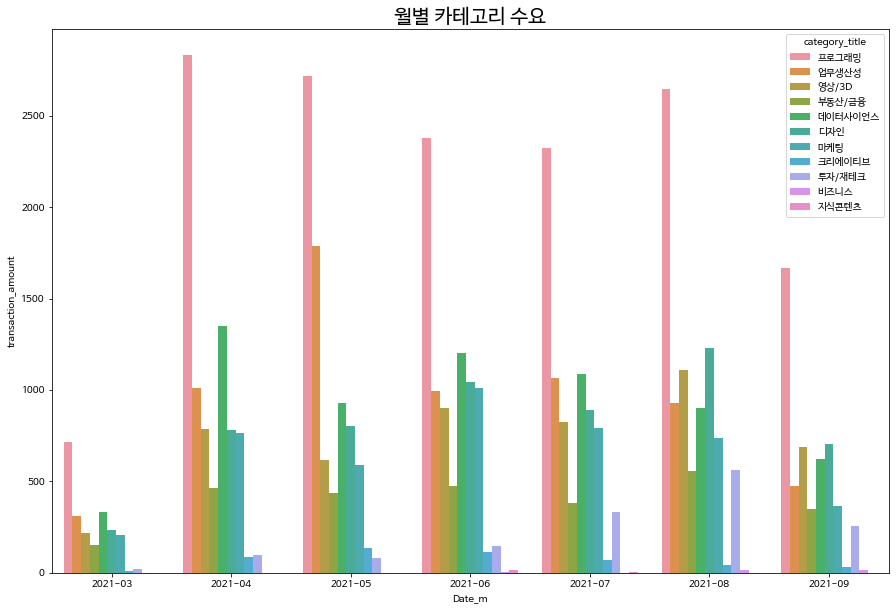

In [ ]:
# 패캠 월별 강의 수요량

plt.figure(figsize=(15,10))
sns.barplot(data=AM, x='Date_m', y='transaction_amount', estimator=len,  hue='category_title')
plt.title('월별 카테고리 수요', fontsize=20)

#### 패캠 카테고리별 월수익
* 강의자들의 수요를 알았다면 실질적으로 그 수요가 이익이 되는지 분석해보았다
> 이익에서 취소와 환불을 제외하였다.
* 프로그래밍을 제외하고 거의 수익과 유사함을 알수있었다. 
* 수요 그래프에서는 프로그래밍 카테고리가 약간 줄어드는 추세였지만
* 수익 그래프에서는 이 우상향 그래프를 나타내 
* 금액적인 부분을 아끼지 않는모습을 알수있었다. 



Text(0.5, 1.0, '카테고리별 월수익')

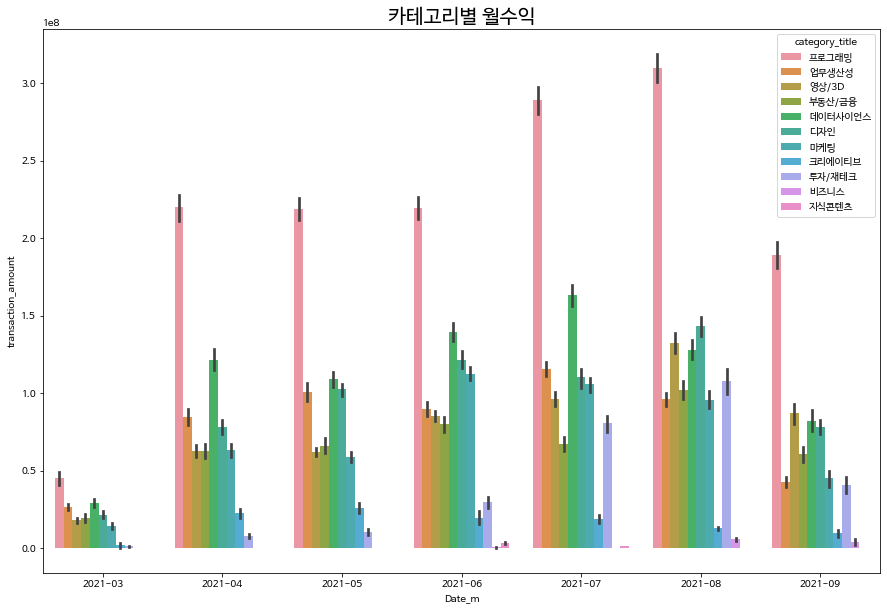

In [ ]:
# 패캠 카테고리별 월수익

plt.figure(figsize=(15,10))
sns.barplot(data=mk3, x='Date_m', y='transaction_amount', estimator=np.sum, hue='category_title')
plt.title('카테고리별 월수익', fontsize=20)

#### 패캠 월별 총수익
* 종합적으로 총수익을 보면 6,7,8 월에 가장많은 수익이 났다.
* 프로그래밍의 매출과 비슷한 모양
* 프로그래밍 강좌의 퀄리티를 높이고 프로그래밍 중점인 마케팅홍보가 많은 이익을 유지할수 있다.
* 또한 프로그래밍의 할인율을 줄여 더 많은 수익을 낼수 있다.
 

Text(0.5, 1.0, '월별 총수익')

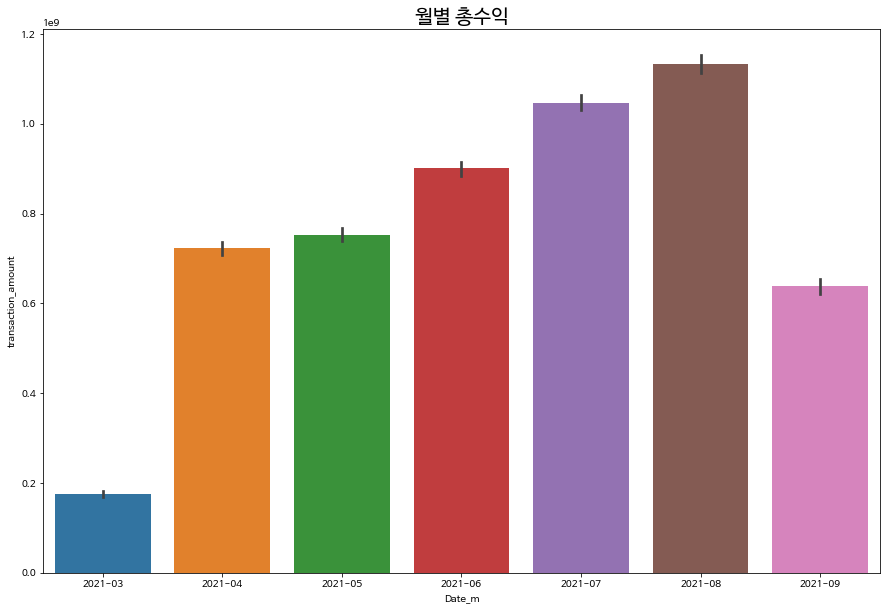

In [ ]:
# 패캠 월별 총수익
plt.figure(figsize=(15,10))
sns.barplot(data=mk3, x='Date_m', y='transaction_amount', estimator=np.sum)
plt.title('월별 총수익', fontsize=20)

* 환불 상품 


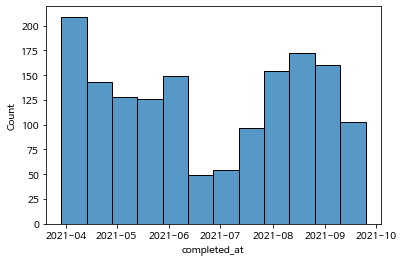

In [ ]:
# AM1 = 전체적으로 환불된 상품들 total 
sns.histplot(data=AM1[AM1.coupon_discount_amount !=0], x='completed_at')

Text(0.5, 1.0, '월별 환불량')

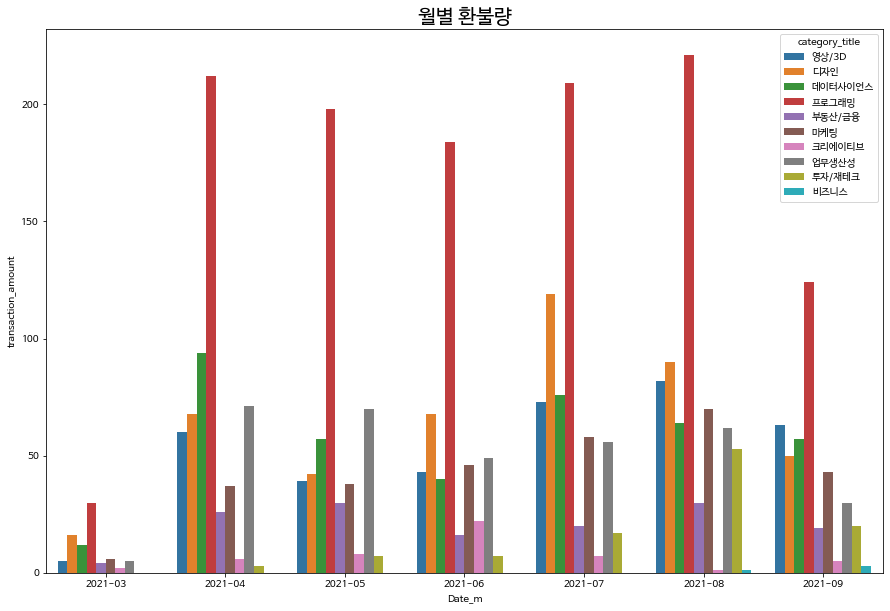

In [ ]:
# 패캠 월별 Refunded량

plt.figure(figsize=(15,10))
sns.barplot(data=AM1, x='Date_m', y='transaction_amount', estimator=len,  hue='category_title')
plt.title('월별 환불량', fontsize=20)

## 윤상현
- 카테고리(category_title, subcategory_title)를 중심으로 정리하고 분석하였음.
- 해당의 카테고리와 서브 카테고리에 대한 분석 중, 구매가 추가적으로 이루어진 상품에 대해 파고들기로 함.

### How to?  

1. 구매 횟수가 2회 이상인 customer_id 필터링
2. sort by customer_id, completed_at
3. group by customer_id
4. 가장 많은 카테고리 프로그래밍을 중심으로 구매 횟수 홧인

In [ ]:
# 윤상현 mk1 으로 진행
mk1 = mk.copy()
# mk1

In [ ]:
# Payment - Completed인 row를 제외하고 drop
mk1.drop(mk1[(mk1['type'].str.contains('PAYMENT')!=True)].index, inplace=True)
mk1.drop(mk1[(mk1['state'].str.contains('COMPLETED')!=True)].index, inplace=True)

In [ ]:
mk1['customer_id'].value_counts(ascending=False)

98685     51
427973    47
158374    42
50769     36
3189      36
          ..
546248     1
546247     1
546230     1
546233     1
610626     1
Name: customer_id, Length: 36234, dtype: int64

In [ ]:
# sort by customer_id and completed_at
mk1 = mk1.sort_values(['customer_id', 'completed_at'],ascending = [True, True])
mk1.head(7)

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,pg,method,subcategory_title,marketing_start_at
21091,1039780,47,203078.0,PAYMENT,COMPLETED,올인원 패키지 : 딥러닝을 활용한 추천시스템 구현,데이터사이언스,올인원,2021-04-29 18:32:15,139500,coupon_unapplied,0,139500,KAKAO,POINT,딥러닝/인공지능,2020-10-13
65777,1206695,47,203533.0,PAYMENT,COMPLETED,연습문제 패키지 : 퀴즈처럼 풀면서 배우는 파이썬 머신러닝 300제+,데이터사이언스,올인원,2021-07-09 16:14:40,104000,coupon_unapplied,0,104000,KAKAO,POINT,머신러닝,2021-01-05
2235,976946,79,200328.0,PAYMENT,COMPLETED,올인원 패키지 : 파이썬 웹 개발,프로그래밍,올인원,2021-03-30 13:59:52,0,수강생 50만명 돌파 기념 감사제 쿠폰,170000,124000,NaN,PROMOTION,웹개발,NaT
96586,1357458,96,207031.0,PAYMENT,COMPLETED,편집하는여자의 영상편집 마스터클래스 - 제 2강 10가지 편집기법으로 프리미어 레벨...,영상/3D,올인원,2021-09-21 17:51:18,289000,coupon_unapplied,0,289000,INICIS,CARD,영상 편집,2021-09-06
89988,1322793,153,206044.0,PAYMENT,COMPLETED,올인원 패키지 : 유전 알고리즘을 활용한 머신러닝 입력 최적화 및 대안 제안 메소드,데이터사이언스,올인원,2021-08-31 23:57:29,219000,coupon_unapplied,0,219000,INICIS,CARD,머신러닝,2021-07-26
94703,1344225,153,203076.0,PAYMENT,COMPLETED,올인원 패키지 : 파이썬을 활용한 이커머스 데이터 분석,데이터사이언스,올인원,2021-09-13 11:16:52,139000,coupon_unapplied,0,139000,INICIS,CARD,데이터분석,2020-09-11
95529,1348577,153,203355.0,PAYMENT,COMPLETED,올인원 패키지 : 처음부터 시작하는 딥러닝 유치원,데이터사이언스,올인원,2021-09-15 22:07:47,159000,coupon_unapplied,0,159000,INICIS,CARD,딥러닝/인공지능,2021-01-14


In [ ]:
# 고객 당 구매 몇 번째 구매인지를 알기위한 카운트 칼럼 추가
# 보기 편하게 인덱스의 순서 변경

mk1["purchasesCount_customer"] = pd.NaT
mk1 = mk1.reindex(columns=['customer_id','type', 'state','category_title','subcategory_title','completed_at','purchasesCount_customer'])

# Customer_id를 기준으로 구매 횟수 카운트
mk1['purchasesCount_customer'] = mk1.sort_values('completed_at').groupby('customer_id').cumcount()+1
mk1.head(7)

,customer_id,type,state,category_title,subcategory_title,completed_at,purchasesCount_customer
21091,47,PAYMENT,COMPLETED,데이터사이언스,딥러닝/인공지능,2021-04-29 18:32:15,1
65777,47,PAYMENT,COMPLETED,데이터사이언스,머신러닝,2021-07-09 16:14:40,2
2235,79,PAYMENT,COMPLETED,프로그래밍,웹개발,2021-03-30 13:59:52,1
96586,96,PAYMENT,COMPLETED,영상/3D,영상 편집,2021-09-21 17:51:18,1
89988,153,PAYMENT,COMPLETED,데이터사이언스,머신러닝,2021-08-31 23:57:29,1
94703,153,PAYMENT,COMPLETED,데이터사이언스,데이터분석,2021-09-13 11:16:52,2
95529,153,PAYMENT,COMPLETED,데이터사이언스,딥러닝/인공지능,2021-09-15 22:07:47,3


In [ ]:
# 6번 이상 결제한 row들 drop (데이터 간소화)
mk1.drop(mk1[(mk1['purchasesCount_customer']>5)].index, inplace=True)
# mk1.head(30)

# customer_id.count() == 1인 사람들 drop _ 구매 횟수가 1회인 사람들 drop
# 2회 이상 구매한 사람들을 대상으로 한 관계분석이기 때문에
count = mk1.customer_id.value_counts()
mk1.drop(mk1[mk1.customer_id.isin(count[count==1].index)].index, inplace=True)

In [ ]:
Carlist = mk1['category_title'].unique()

for i in Carlist:
  num_rows=mk1[(mk1['purchasesCount_customer'] == 1) & (mk1['category_title'] == i)]['customer_id'].count()
  print(i, ':', num_rows)

데이터사이언스 : 1123
업무생산성 : 884
프로그래밍 : 2565
부동산/금융 : 458
디자인 : 732
마케팅 : 513
영상/3D : 653
투자/재테크 : 184
크리에이티브 : 60
비즈니스 : 4
지식콘텐츠 : 1


In [ ]:
for i in Carlist:
  num_rows=mk1[(mk1['purchasesCount_customer'] == 2) & (mk1['category_title'] == i)]['customer_id'].count()
  print(i, ':', num_rows)

데이터사이언스 : 1101
업무생산성 : 886
프로그래밍 : 2526
부동산/금융 : 452
디자인 : 697
마케팅 : 523
영상/3D : 689
투자/재테크 : 230
크리에이티브 : 63
비즈니스 : 7
지식콘텐츠 : 3


In [ ]:
for i in Carlist:
  num_rows=mk1[(mk1['purchasesCount_customer'] == 3) & (mk1['category_title'] == i)]['customer_id'].count()
  print(i, ':', num_rows)

데이터사이언스 : 379
업무생산성 : 273
프로그래밍 : 825
부동산/금융 : 129
디자인 : 215
마케팅 : 148
영상/3D : 186
투자/재테크 : 83
크리에이티브 : 20
비즈니스 : 2
지식콘텐츠 : 4


In [ ]:
mk1['category_title'].value_counts().values

array([6494, 2888, 2214, 1771, 1645, 1289, 1135,  563,  153,   13,    9])

In [ ]:
test = mk1
test['pc_order'] = test.sort_values('completed_at').groupby('customer_id').cumcount()+1

In [ ]:
cond = test.category_title == '프로그래밍'
test_cond = test[cond]

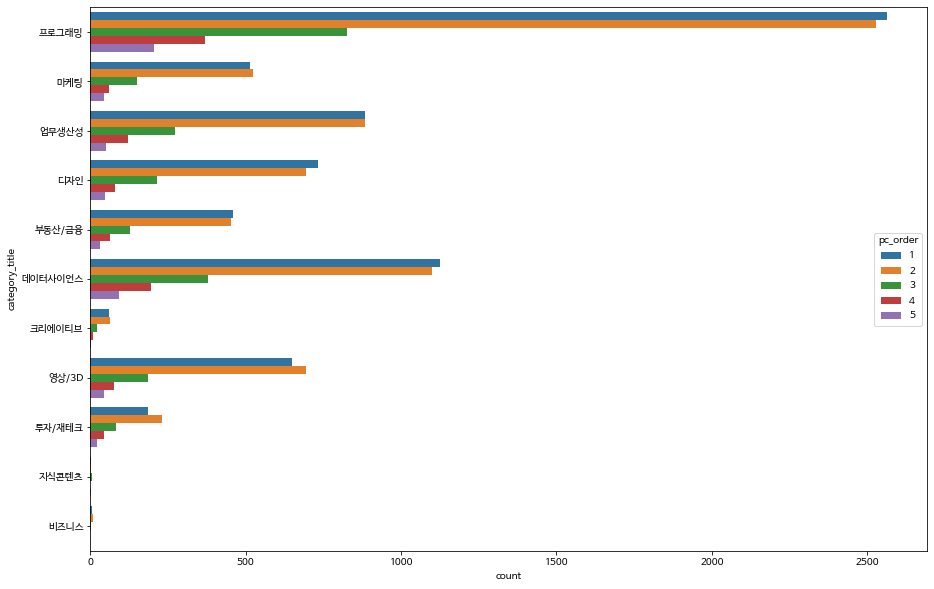

In [ ]:
plt.figure(figsize=(15,10))
sns.countplot(
    y=test['category_title'].sort_index(),
    hue=test['pc_order']
)
plt.show()

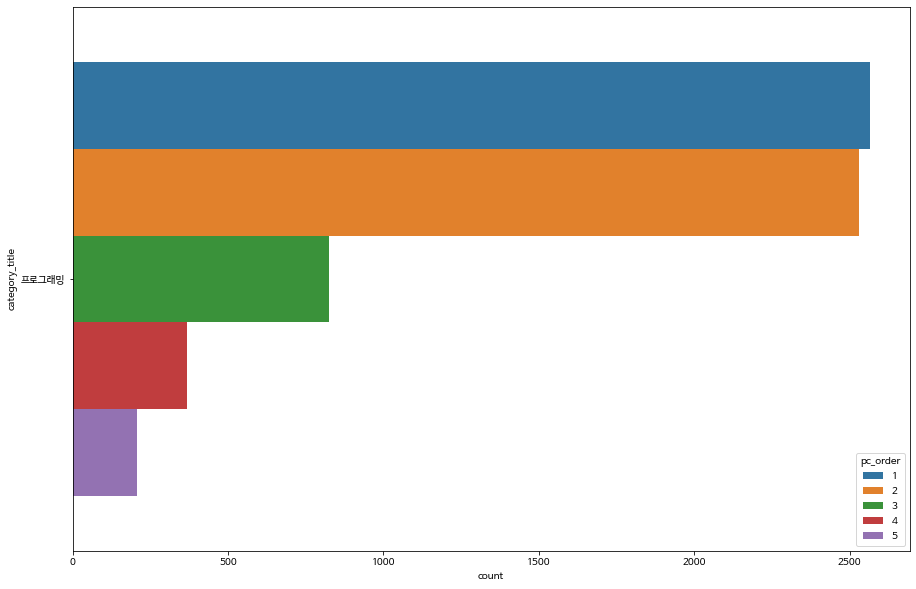

In [ ]:
# 프로그래밍 카테고리로 조건화 했을 때의 구매 횟수 확인
plt.figure(figsize=(15,10))
sns.countplot(
    y=test_cond['category_title'].sort_index(),
    hue=test['pc_order']
)
plt.show()

##### category _ 2차 구매

###### 전체 heatmap

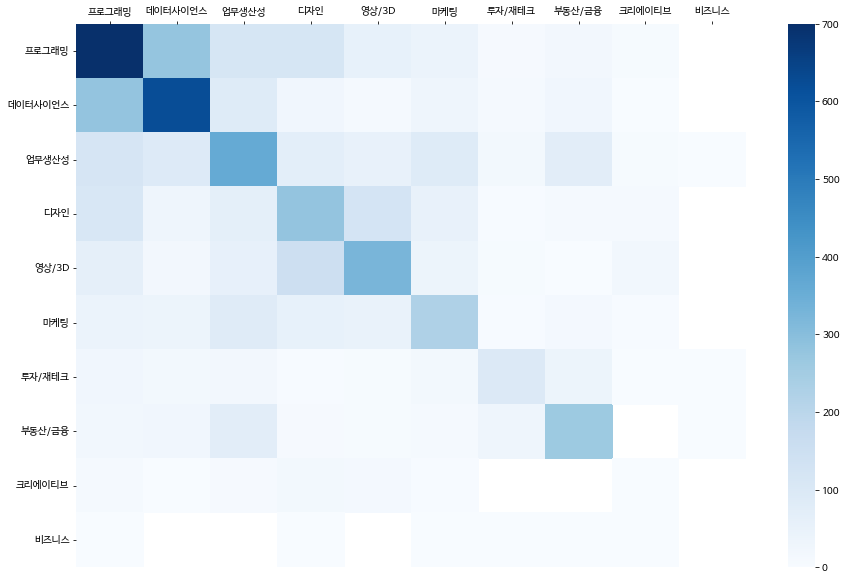

In [ ]:
# index = 2차, column은 1차 구매상품
catlist = {'A':'프로그래밍','B':'디자인','C':'업무생산성','D':'영상/3D','E':'데이터사이언스','F':'크리에이티브','G':'부동산/금융','H':'마케팅','I':'투자/재테크','J':'비즈니스','K':'지식콘텐츠'}


for i in catlist :
  p1 = list(mk1.customer_id[(mk1['pc_order'] == 1) & (mk1['category_title'] == catlist.get(i))])
  p2 = mk1[(mk1.customer_id.isin(p1)==True)&(mk1.pc_order == 2)]

  # 지역변수에서 글로벌 변수로 이동 & str형태의 catlist.keys에서 str의 속성을 지우고 변수로 지정
  globals()["{}".format(i)] = p2.category_title.value_counts().to_frame(name=catlist.get(i))

mx = A
for list2 in [E,C,B,D,H,I,G,F,J]:
    mx =  pd.merge(mx, list2,left_index=True, right_index=True, how='left')

plt.figure(figsize=(15,10))
ax = sns.heatmap(mx,vmin=0, vmax=700,cmap="Blues")
ax.xaxis.tick_top()
ax.set_yticklabels(ax.get_yticklabels(),rotation = 0)
plt.show()

# X축 : 1차 구매한 카테고리
# Y축 : 2차 구매한 카테고리

###### 세부 barplot

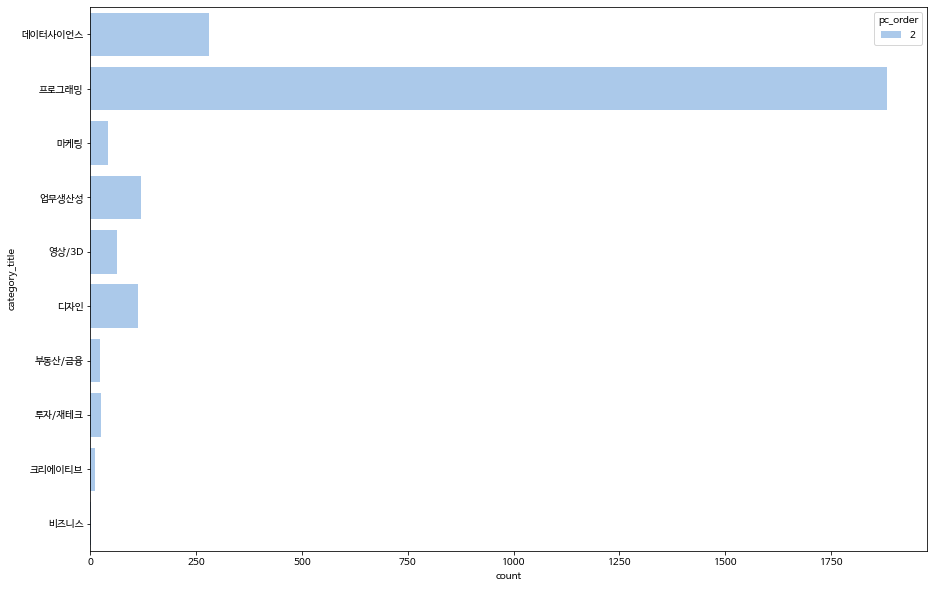

In [ ]:
p1 = list(mk1.customer_id[(mk1['pc_order'] == 1) & (mk1['category_title'] == '프로그래밍')])
p2 = mk1[(mk1.customer_id.isin(p1)==True)&(mk1.pc_order == 2)]

# 1차 구매가 프로그래밍인 고객들이 2차 구매로 구매한 카테고리
plt.figure(figsize=(15,10))
sns.countplot(
    y=p2['category_title'].sort_index(),
    hue=p2['pc_order'],
    palette='pastel'
)
plt.show()

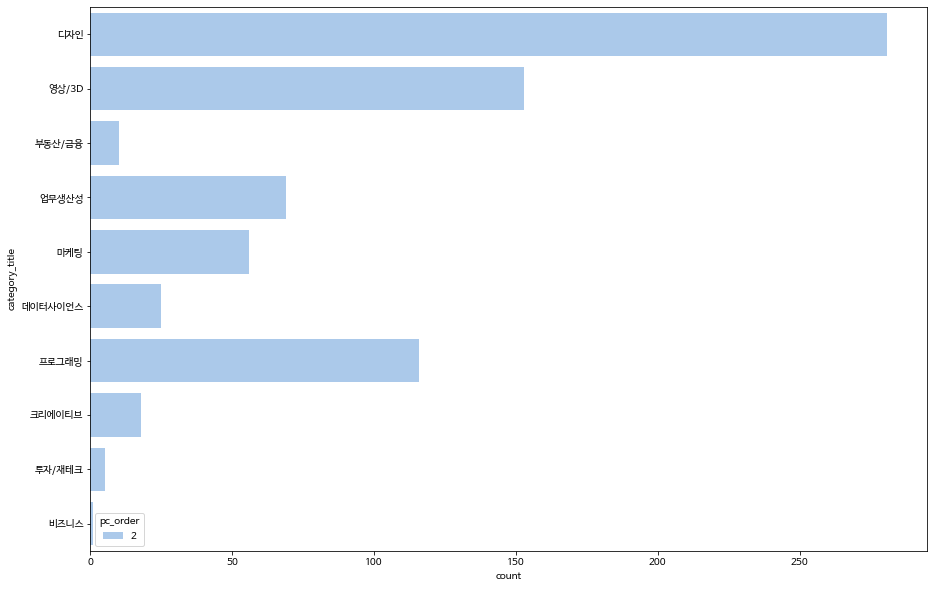

In [ ]:
p1 = list(mk1.customer_id[(mk1['pc_order'] == 1) & (mk1['category_title'] == '디자인')])
p2 = mk1[(mk1.customer_id.isin(p1)==True)&(mk1.pc_order == 2)]

# 1차 구매가 프로그래밍인 고객들이 2차 구매로 구매한 카테고리
plt.figure(figsize=(15,10))
sns.countplot(
    y=p2['category_title'].sort_index(),
    hue=p2['pc_order'],
    palette='pastel'
)
plt.show()

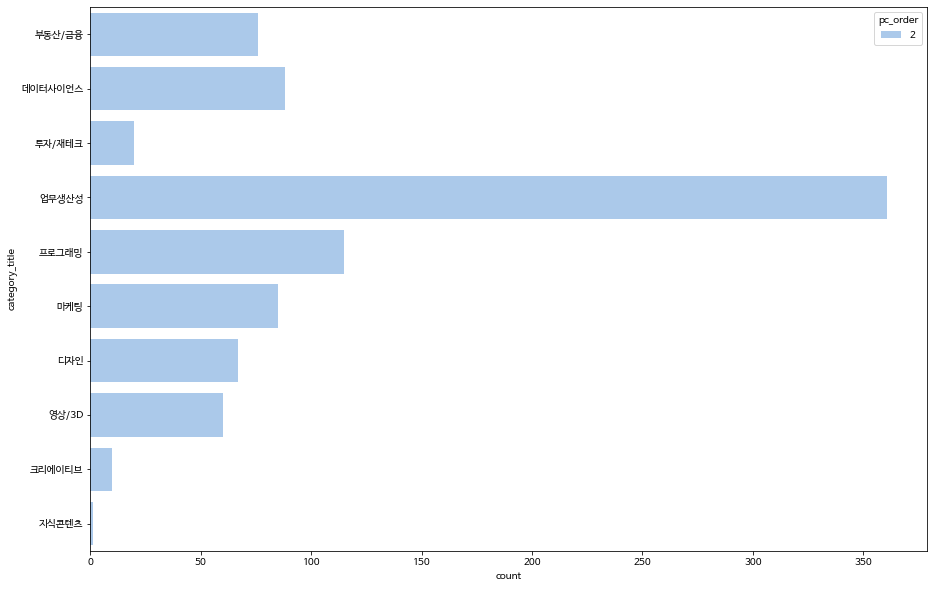

In [ ]:
p1 = list(mk1.customer_id[(mk1['pc_order'] == 1) & (mk1['category_title'] == '업무생산성')])
p2 = mk1[(mk1.customer_id.isin(p1)==True)&(mk1.pc_order == 2)]

# 1차 구매가 프로그래밍인 고객들이 2차 구매로 구매한 카테고리
plt.figure(figsize=(15,10))
sns.countplot(
    y=p2['category_title'].sort_index(),
    hue=p2['pc_order'],
    palette='pastel'
)
plt.show()

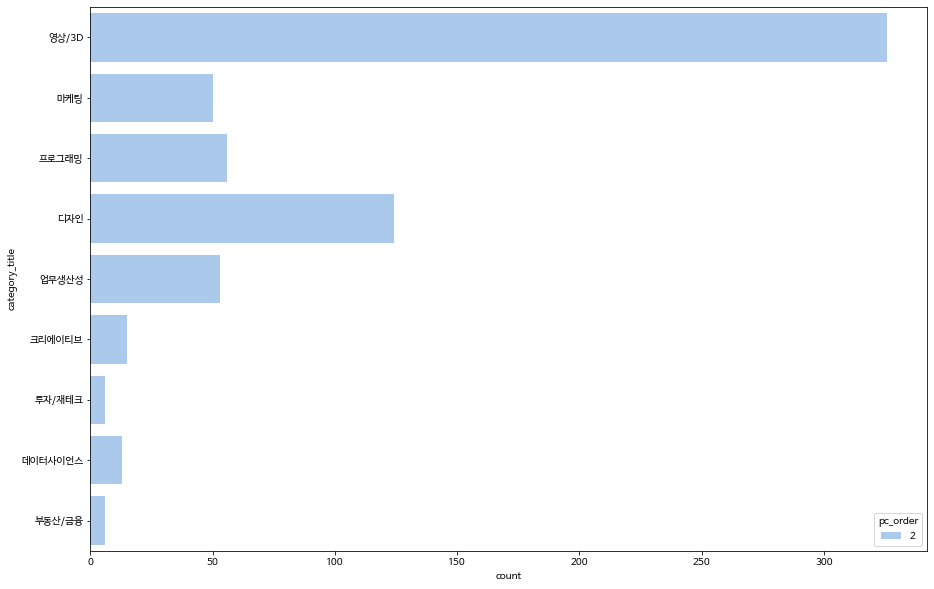

In [ ]:
p1 = list(mk1.customer_id[(mk1['pc_order'] == 1) & (mk1['category_title'] == '영상/3D')])
p2 = mk1[(mk1.customer_id.isin(p1)==True)&(mk1.pc_order == 2)]

# 1차 구매가 프로그래밍인 고객들이 2차 구매로 구매한 카테고리
plt.figure(figsize=(15,10))
sns.countplot(
    y=p2['category_title'].sort_index(),
    hue=p2['pc_order'],
    palette='pastel'
)
plt.show()

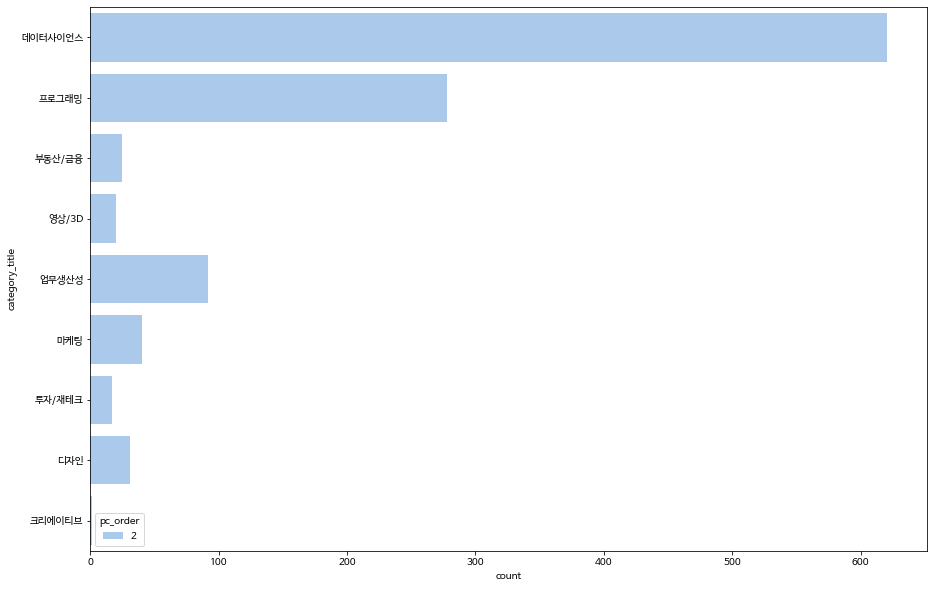

In [ ]:
p1 = list(mk1.customer_id[(mk1['pc_order'] == 1) & (mk1['category_title'] == '데이터사이언스')])
p2 = mk1[(mk1.customer_id.isin(p1)==True)&(mk1.pc_order == 2)]

# 1차 구매가 프로그래밍인 고객들이 2차 구매로 구매한 카테고리
plt.figure(figsize=(15,10))
sns.countplot(
    y=p2['category_title'].sort_index(),
    hue=p2['pc_order'],
    palette='pastel'
)
plt.show()

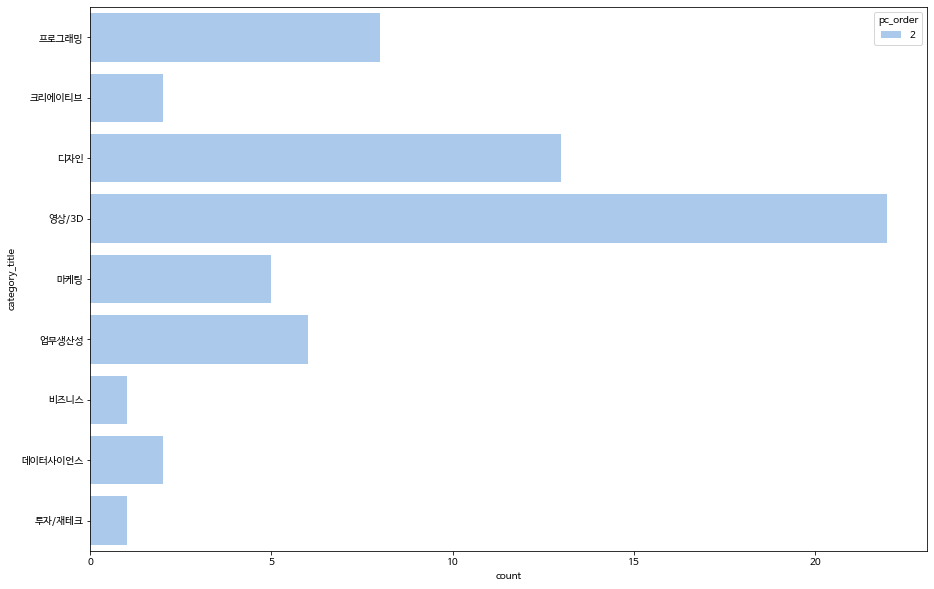

In [ ]:
p1 = list(mk1.customer_id[(mk1['pc_order'] == 1) & (mk1['category_title'] == '크리에이티브')])
p2 = mk1[(mk1.customer_id.isin(p1)==True)&(mk1.pc_order == 2)]

# 1차 구매가 프로그래밍인 고객들이 2차 구매로 구매한 카테고리
plt.figure(figsize=(15,10))
sns.countplot(
    y=p2['category_title'].sort_index(),
    hue=p2['pc_order'],
    palette='pastel'
)
plt.show()

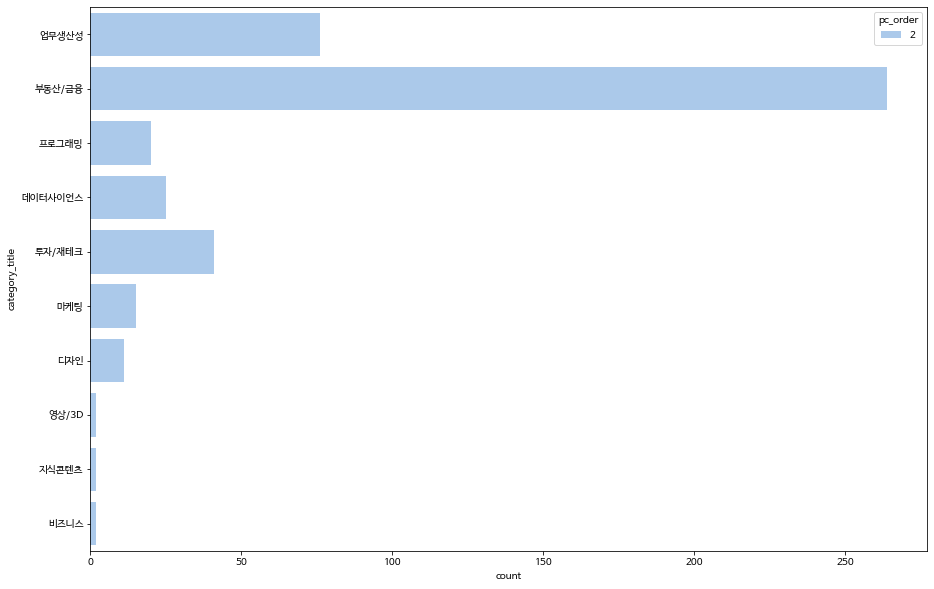

In [ ]:
p1 = list(mk1.customer_id[(mk1['pc_order'] == 1) & (mk1['category_title'] == '부동산/금융')])
p2 = mk1[(mk1.customer_id.isin(p1)==True)&(mk1.pc_order == 2)]

# 1차 구매가 프로그래밍인 고객들이 2차 구매로 구매한 카테고리
plt.figure(figsize=(15,10))
sns.countplot(
    y=p2['category_title'].sort_index(),
    hue=p2['pc_order'],
    palette='pastel'
)
plt.show()

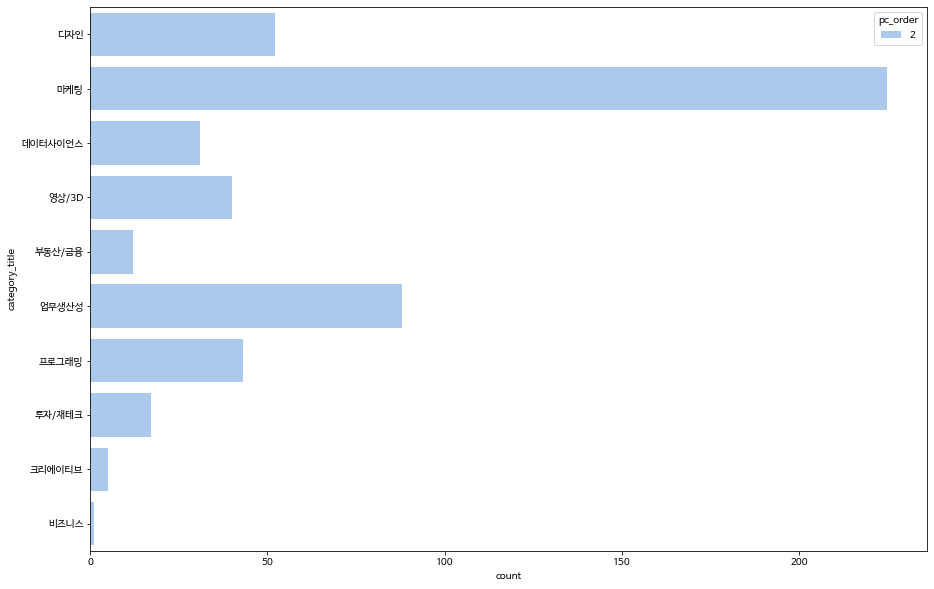

In [ ]:
p1 = list(mk1.customer_id[(mk1['pc_order'] == 1) & (mk1['category_title'] == '마케팅')])
p2 = mk1[(mk1.customer_id.isin(p1)==True)&(mk1.pc_order == 2)]

# 1차 구매가 프로그래밍인 고객들이 2차 구매로 구매한 카테고리
plt.figure(figsize=(15,10))
sns.countplot(
    y=p2['category_title'].sort_index(),
    hue=p2['pc_order'],
    palette='pastel'
)
plt.show()

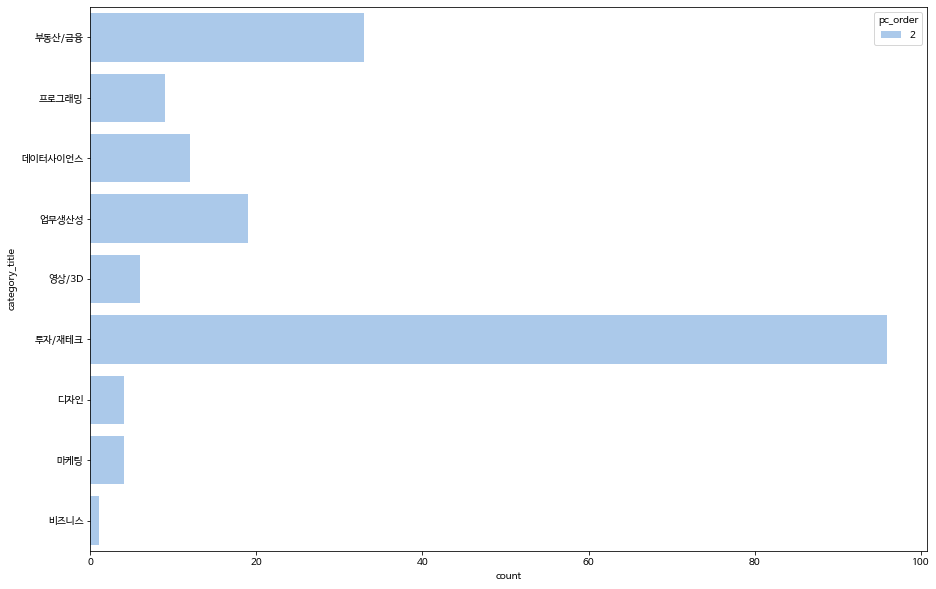

In [ ]:
p1 = list(mk1.customer_id[(mk1['pc_order'] == 1) & (mk1['category_title'] == '투자/재테크')])
p2 = mk1[(mk1.customer_id.isin(p1)==True)&(mk1.pc_order == 2)]

# 1차 구매가 프로그래밍인 고객들이 2차 구매로 구매한 카테고리
plt.figure(figsize=(15,10))
sns.countplot(
    y=p2['category_title'].sort_index(),
    hue=p2['pc_order'],
    palette='pastel'
)
plt.show()

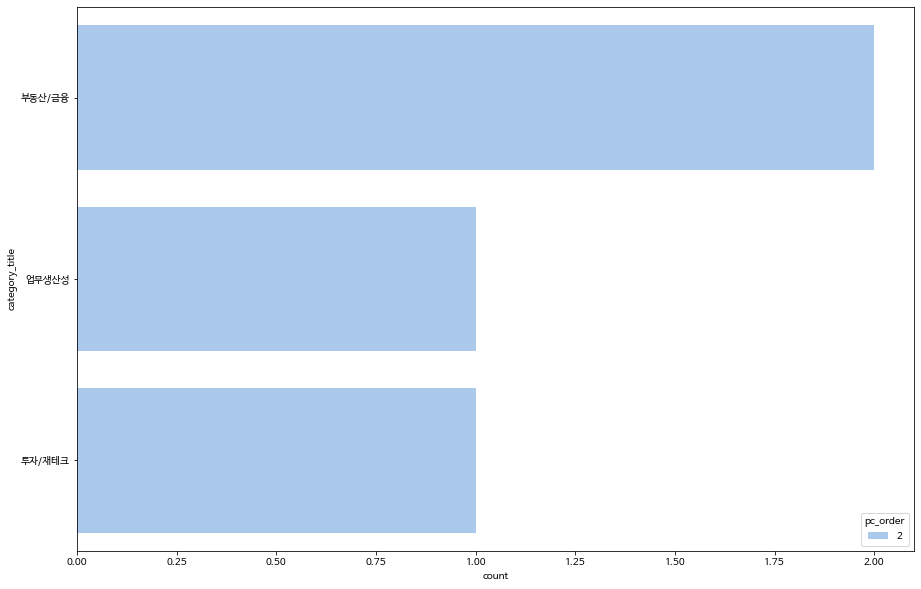

In [ ]:
p1 = list(mk1.customer_id[(mk1['pc_order'] == 1) & (mk1['category_title'] == '비즈니스')])
p2 = mk1[(mk1.customer_id.isin(p1)==True)&(mk1.pc_order == 2)]

# 1차 구매가 프로그래밍인 고객들이 2차 구매로 구매한 카테고리
plt.figure(figsize=(15,10))
sns.countplot(
    y=p2['category_title'].sort_index(),
    hue=p2['pc_order'],
    palette='pastel'
)
plt.show()

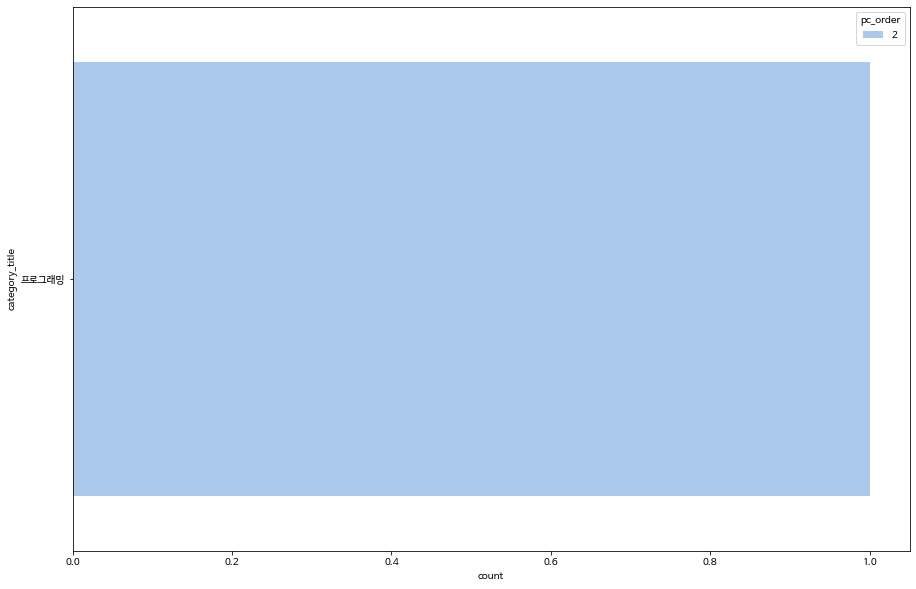

In [ ]:
p1 = list(mk1.customer_id[(mk1['pc_order'] == 1) & (mk1['category_title'] == '지식콘텐츠')])
p2 = mk1[(mk1.customer_id.isin(p1)==True)&(mk1.pc_order == 2)]

# 1차 구매가 프로그래밍인 고객들이 2차 구매로 구매한 카테고리
plt.figure(figsize=(15,10))
sns.countplot(
    y=p2['category_title'].sort_index(),
    hue=p2['pc_order'],
    palette='pastel'
)
plt.show()

##### subcategory

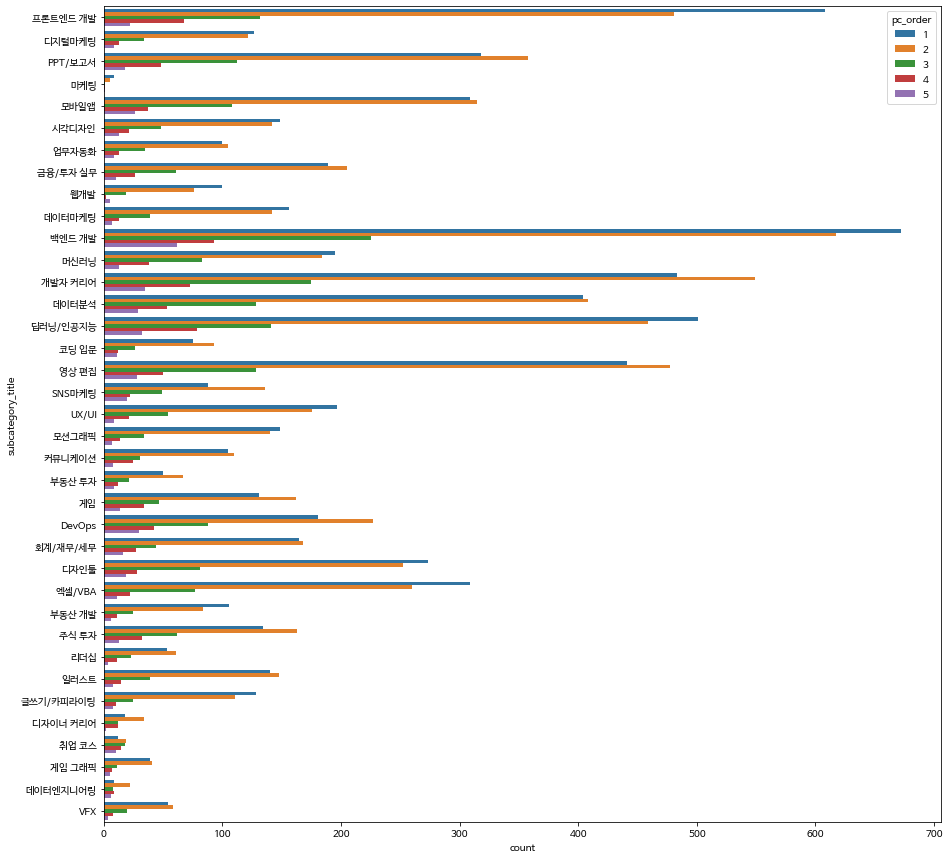

In [ ]:
test = mk1

plt.figure(figsize=(15,15))
sns.countplot(
    y=test['subcategory_title'].sort_index(),
    hue=test['pc_order']
)
plt.show()

##오세연
- 고객의 의사 및 구매 단계에 대한 내용을 위주로 정리 및 분석(주로 type 과 state)하였음.
- 구매 단계 부분을 단순화 및 정리 중 실질적 구매에 대한 내용으로 방향을 틈.
- 이후 구매가 확정된 상품에 대한 내용 분석으로 파고들기로 함.

### How to?  
1. 정리를 담당한 order 와 payment의 상태에 대해 집중적 분석
2. 카테고리 별 상태적 분석하기
3. 구매의 확정적 상태를 기준으로 분석하기

In [ ]:
# 오세연 mk2 으로 진행
mk2 = mk.copy()
# mk2

In [ ]:
# 고객(=타겟층, 취업준비생)의 order의 의사와 payment에 대한 의사에 대해 분석해보기로 함. 
# 고객의 구매의사에 대해 분류하기 위해서 type과 state를 하나로 합치고, 해당의 type과 state의 결합 상태에 번호를 매기기로 함.
mk2 # 97522 rows × 19 columns
mk2['type/state'] = mk2['type']+mk2['state']
mk2['type/state'].value_counts()
# type/state 번호 매기기 -> ts_num
mk2['ts_num'] = mk2['type/state']
for i in range(len(mk2['ts_num'].value_counts().index)) : 
    mk2['ts_num'] = mk2['ts_num'].replace(mk2['ts_num'].value_counts().index[i], i)
mk2['ts_num'] = mk2['ts_num'].astype(int)
# 그리고 type 과 state는 내용의 중복이므로 drop 처리
mk2 = mk2.drop(['type','state'], axis=1)

In [ ]:
# 카테고리와 서브 카테고리도 번호 매기기
mk2['cate_num'] = mk2['category_title']
mk2['subcate_num'] = mk2['subcategory_title']
# 카테고리 번호 매기기
for i in range(len(mk2['cate_num'].value_counts().index)) : 
    mk2['cate_num'] = mk2['cate_num'].replace(mk2['cate_num'].value_counts().index[i], i)
# 서브 카테고리 번호 매기기
for i in range(len(mk2['subcate_num'].value_counts().index)) : 
    mk2['subcate_num'] = mk2['subcate_num'].replace(mk2['subcate_num'].value_counts().index[i], i)

In [ ]:
mk2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97522 entries, 0 to 97521
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   id                      97522 non-null  int64         
 1   customer_id             97522 non-null  int64         
 2   course_id               93283 non-null  float64       
 3   course_title            97522 non-null  object        
 4   category_title          97522 non-null  object        
 5   format                  97522 non-null  object        
 6   completed_at            97522 non-null  datetime64[ns]
 7   transaction_amount      97522 non-null  int64         
 8   coupon_title            97522 non-null  object        
 9   coupon_discount_amount  97522 non-null  int64         
 10  sale_price              97522 non-null  int64         
 11  pg                      85253 non-null  object        
 12  method                  84863 non-null  object

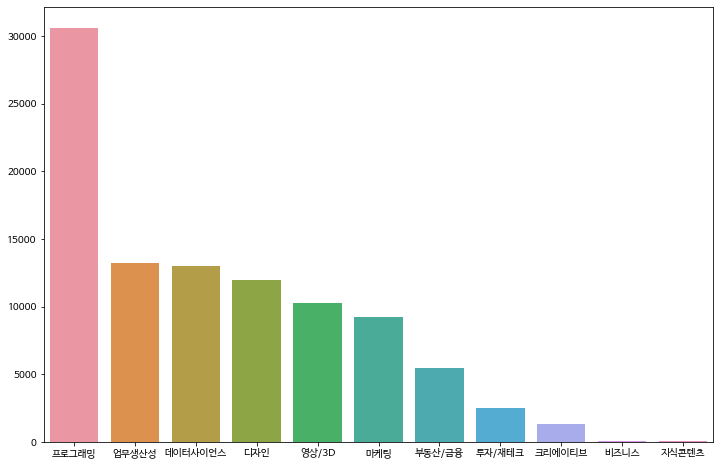

In [ ]:
# 카테고리 별 시각화 해보기
plt.figure(figsize=(12, 8))
sns.barplot(x=mk2['category_title'].value_counts().index, y=mk2['category_title'].value_counts().values, ci=None)

plt.show()

# 1차적으로 봤을 때, 프로그래밍이 압도적으로 놓은 결과를 확인.

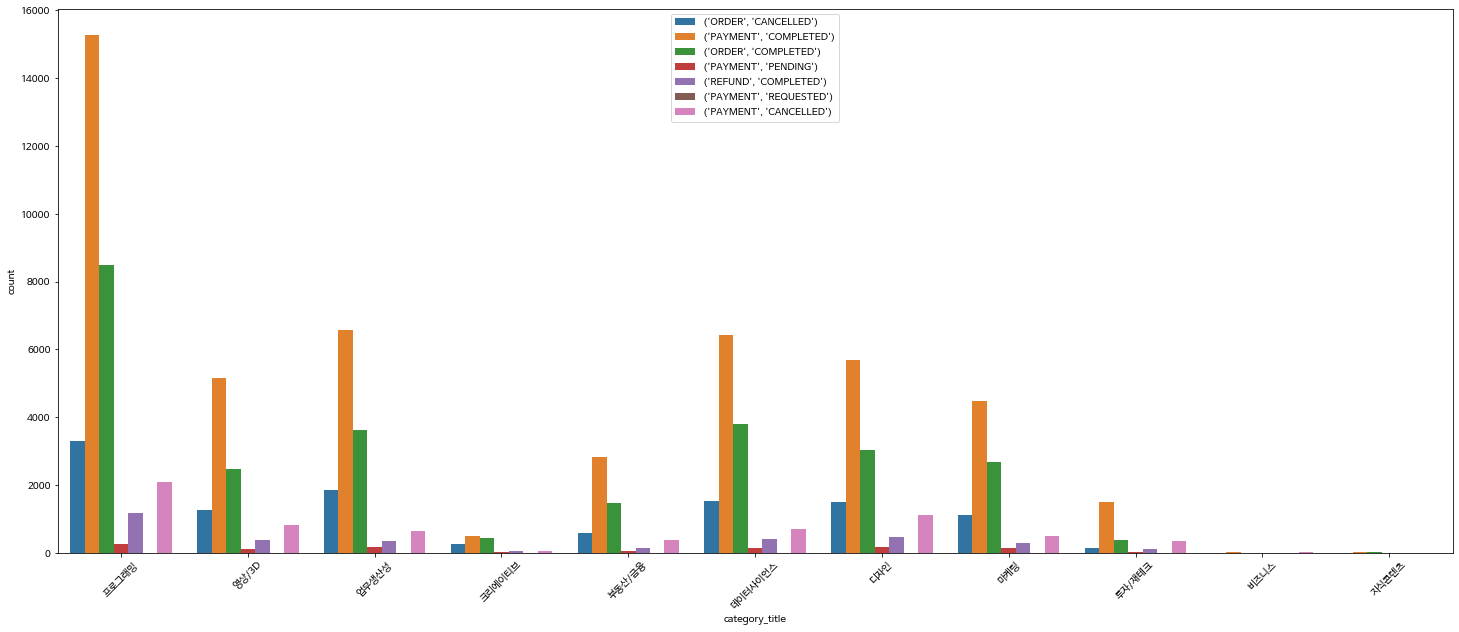

In [ ]:
# 전체적으로 카테고리별, 구매 단계에 대해 간단하게 시각화

plt.figure(figsize=(25, 10))

sns.countplot(
    data=mk,
    x=mk['category_title'].sort_index(),
    hue=mk[['type','state']].apply(tuple, axis=1)
)
plt.xticks(rotation=45)
plt.legend(loc='upper center')
plt.show()

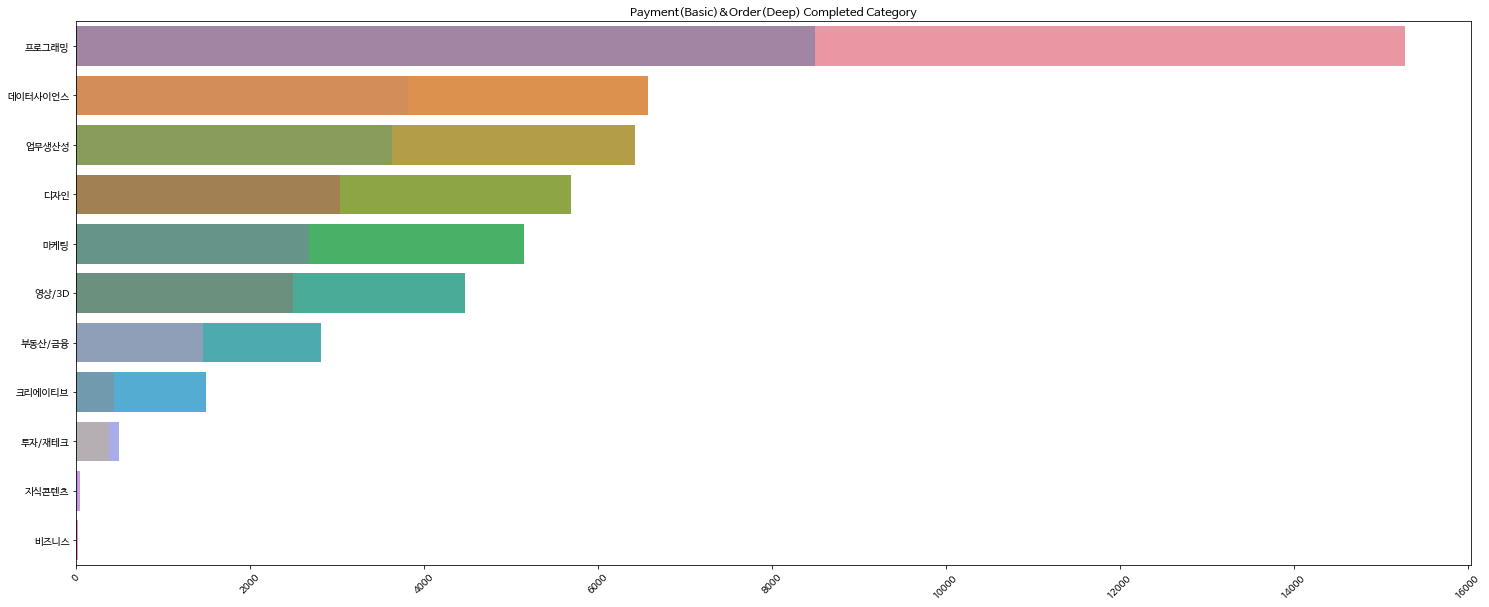

In [ ]:
# 수가 너무 적고 의미가 적은 payment - request, pending 등은 고객의 의사와도 연관이 없으므로 사용에서 제외.
# 수강신청 완료한 것과 구매 확정에 대해서 확인해보기
paycom = mk2[mk2['ts_num'] == 0] # PAYMENTCOMPLETED    48438 -> 0
odrcom = mk2[mk2['ts_num'] == 1] # ORDERCOMPLETED      26419 -> 1

plt.figure(figsize=(25, 10))

sns.barplot(
    data=paycom,
    x=paycom['category_title'].value_counts().values,
    y=paycom['category_title'].value_counts().index,
    alpha = 1.0,
)
sns.barplot(
    data=odrcom,
    x=odrcom['category_title'].value_counts().values,
    y=odrcom['category_title'].value_counts().index,
    palette='deep',
    alpha = 0.5,
)

plt.title('Payment(Basic)&Order(Deep) Completed Category')
plt.xticks(rotation=45)
plt.show()

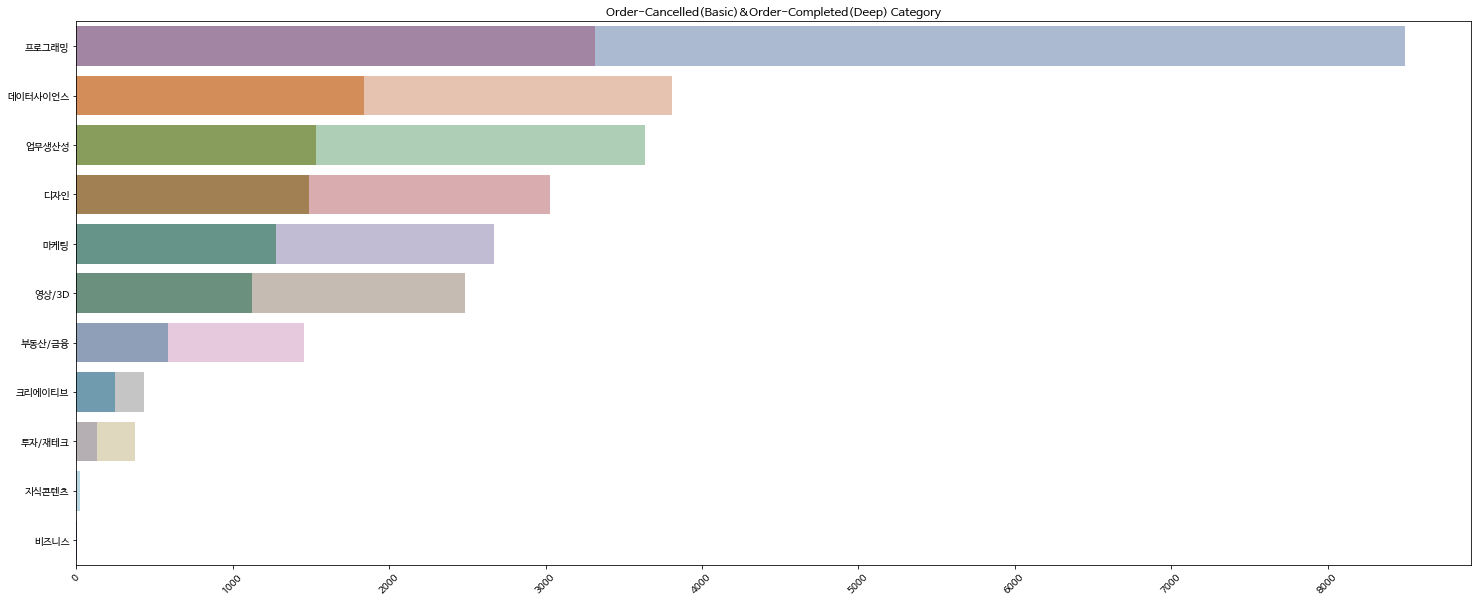

In [ ]:
# Order-Completed 와 Order-Cancelled 비교하기.
odrcom = mk2[mk2['ts_num'] == 1] # ORDERCOMPLETED      26419 -> 1
odrcan = mk2[mk2['ts_num'] == 2] # ORDERCANCELLED      11542 -> 2

plt.figure(figsize=(25, 10))

sns.barplot(
    data=odrcan,
    x=odrcan['category_title'].value_counts().values,
    y=odrcan['category_title'].value_counts().index,
    alpha = 1.0,
)
sns.barplot(
    data=odrcom,
    x=odrcom['category_title'].value_counts().values,
    y=odrcom['category_title'].value_counts().index,
    palette='deep',
    alpha = 0.5,
)

plt.title('Order-Cancelled(Basic)&Order-Completed(Deep) Category')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# 위의 결론으로 구매 확정 중에서, 프로그래밍이 압도적으로 높고, 그 다음이 업무생산성, 데이터사이언스, 디자인, 영상/3D, 마케팅 정도가 높은 것으로 확인.
# 카테고리별 분석의 가능성을 보고, 우선 상위 6개를 뽑아서 필터링
programming = mk2[mk2['category_title'] == '프로그래밍']
bizprod = mk2[mk2['category_title'] == '업무생산성']
datasci = mk2[mk2['category_title'] == '데이터사이언스']
design = mk2[mk2['category_title'] == '디자인']
vision = mk2[mk2['category_title'] == '영상/3D']
marketing = mk2[mk2['category_title'] == '마케팅']

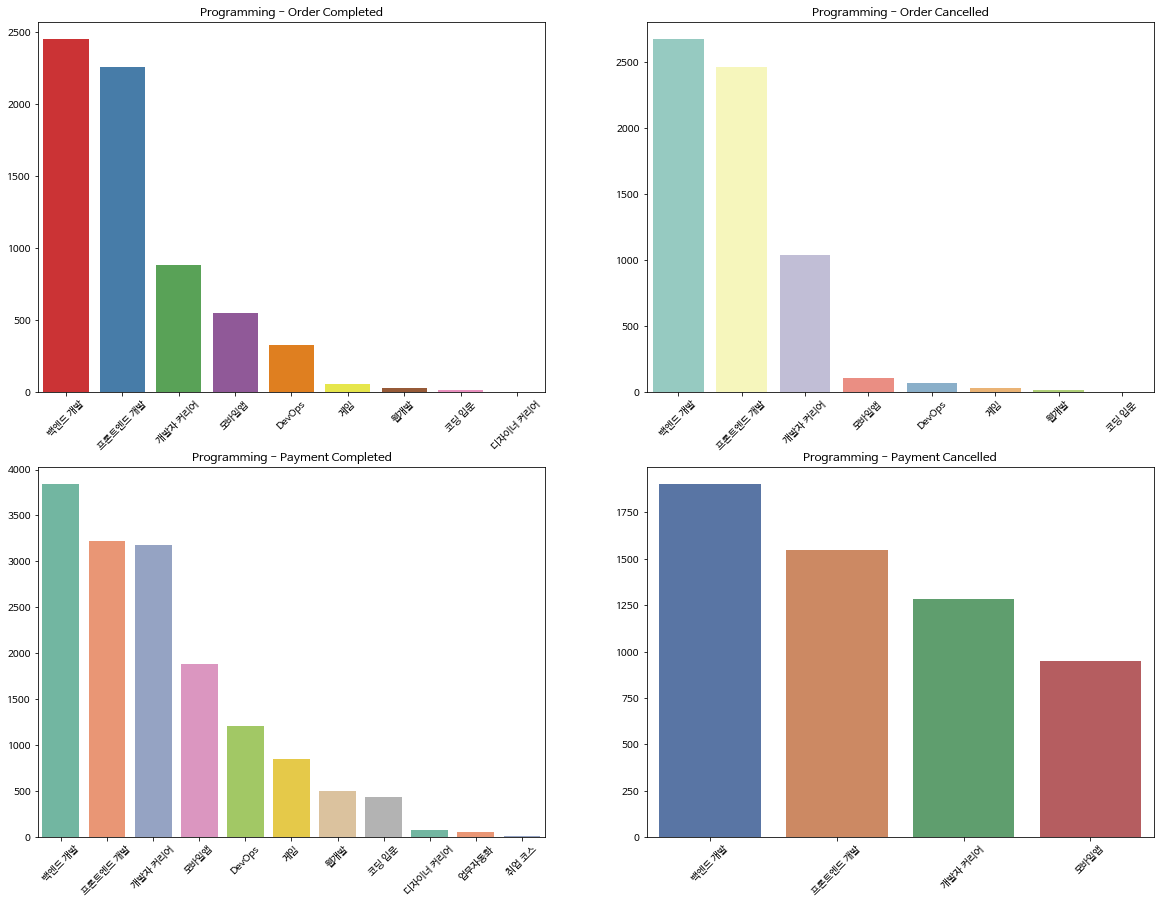

In [ ]:
# 프로그래밍 카테고리의 수강신청 여부와 구매의 결정/취소 한 눈에 보기

# Subplots
fig = plt.figure(figsize=(20,15))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)

labels = programming['subcategory_title'].value_counts().index

ax1.title.set_text('Programming - Order Completed')
sns.barplot(x=mk2[(mk2['cate_num'] == 1) & (mk2['ts_num'] == 0)]['subcategory_title'].value_counts().index, 
            y=mk2[(mk2['cate_num'] == 1) & (mk2['ts_num'] == 0)]['subcategory_title'].value_counts().values, palette='Set1', ax=ax1
            )
ax1.set_xticklabels(labels, rotation=45)

ax2.title.set_text('Programming - Order Cancelled')
sns.barplot(x=mk2[(mk2['cate_num'] == 2) & (mk2['ts_num'] == 0)]['subcategory_title'].value_counts().index, 
            y=mk2[(mk2['cate_num'] == 2) & (mk2['ts_num'] == 0)]['subcategory_title'].value_counts().values, palette='Set3', ax=ax2
            )
ax2.set_xticklabels(labels, rotation=45)

ax3.title.set_text('Programming - Payment Completed')
sns.barplot(x=mk2[(mk2['cate_num'] == 0) & (mk2['ts_num'] == 0)]['subcategory_title'].value_counts().index, 
            y=mk2[(mk2['cate_num'] == 0) & (mk2['ts_num'] == 0)]['subcategory_title'].value_counts().values, palette='Set2', ax=ax3
            )
ax3.set_xticklabels(labels, rotation=45)


ax4.title.set_text('Programming - Payment Cancelled')
sns.barplot(x=mk2[(mk2['cate_num'] == 3) & (mk2['ts_num'] == 0)]['subcategory_title'].value_counts().index, 
            y=mk2[(mk2['cate_num'] == 3) & (mk2['ts_num'] == 0)]['subcategory_title'].value_counts().values, palette='deep', ax=ax4
            )
ax4.set_xticklabels(labels, rotation=45)


plt.show()

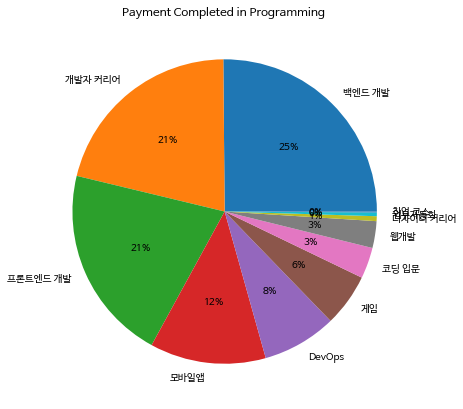

In [ ]:
# 가장 비율이 높은 프로그래밍을 위주로 탐구. Payment-Completed 된 프로그래밍 중 pie 차트로 비율상은 어떤지 확인.
fig = plt.figure(figsize=(10,7))
plt.pie(x=mk2[(mk2['ts_num'] == 0) & (mk2['cate_num'] == 0)]['subcate_num'].value_counts(), labels=mk2[(mk2['ts_num'] == 0) & (mk2['cate_num'] == 0)]['subcategory_title'].value_counts().index, autopct='%.0f%%')
# TypeError: pie() got an unexpected keyword argument 'ax' -> pie() 에서는 ax 라는 인수가 없음 확인.
plt.title("Payment Completed in Programming ")
plt.show()

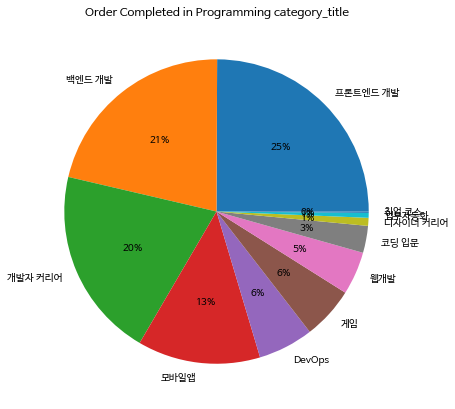

In [ ]:
# Order-Completed
fig = plt.figure(figsize=(10,7))
plt.pie(x=mk2[(mk2['ts_num'] == 1) & (mk2['cate_num'] == 0)]['subcate_num'].value_counts(), labels=mk2[(mk2['ts_num'] == 1) & (mk2['cate_num'] == 0)]['subcategory_title'].value_counts().index, autopct='%.0f%%')
plt.title("Order Completed in Programming category_title")
plt.show()

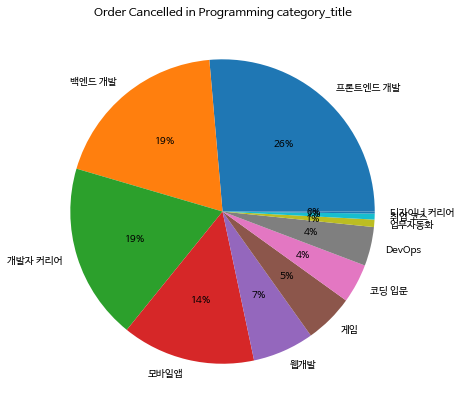

In [ ]:
# Order-Cancelled
fig = plt.figure(figsize=(10,7))
plt.pie(x=mk2[(mk2['ts_num'] == 2) & (mk2['cate_num'] == 0)]['subcate_num'].value_counts(), labels=mk2[(mk2['ts_num'] == 2) & (mk2['cate_num'] == 0)]['subcategory_title'].value_counts().index, autopct='%.0f%%')
plt.title("Order Cancelled in Programming category_title")
plt.show()

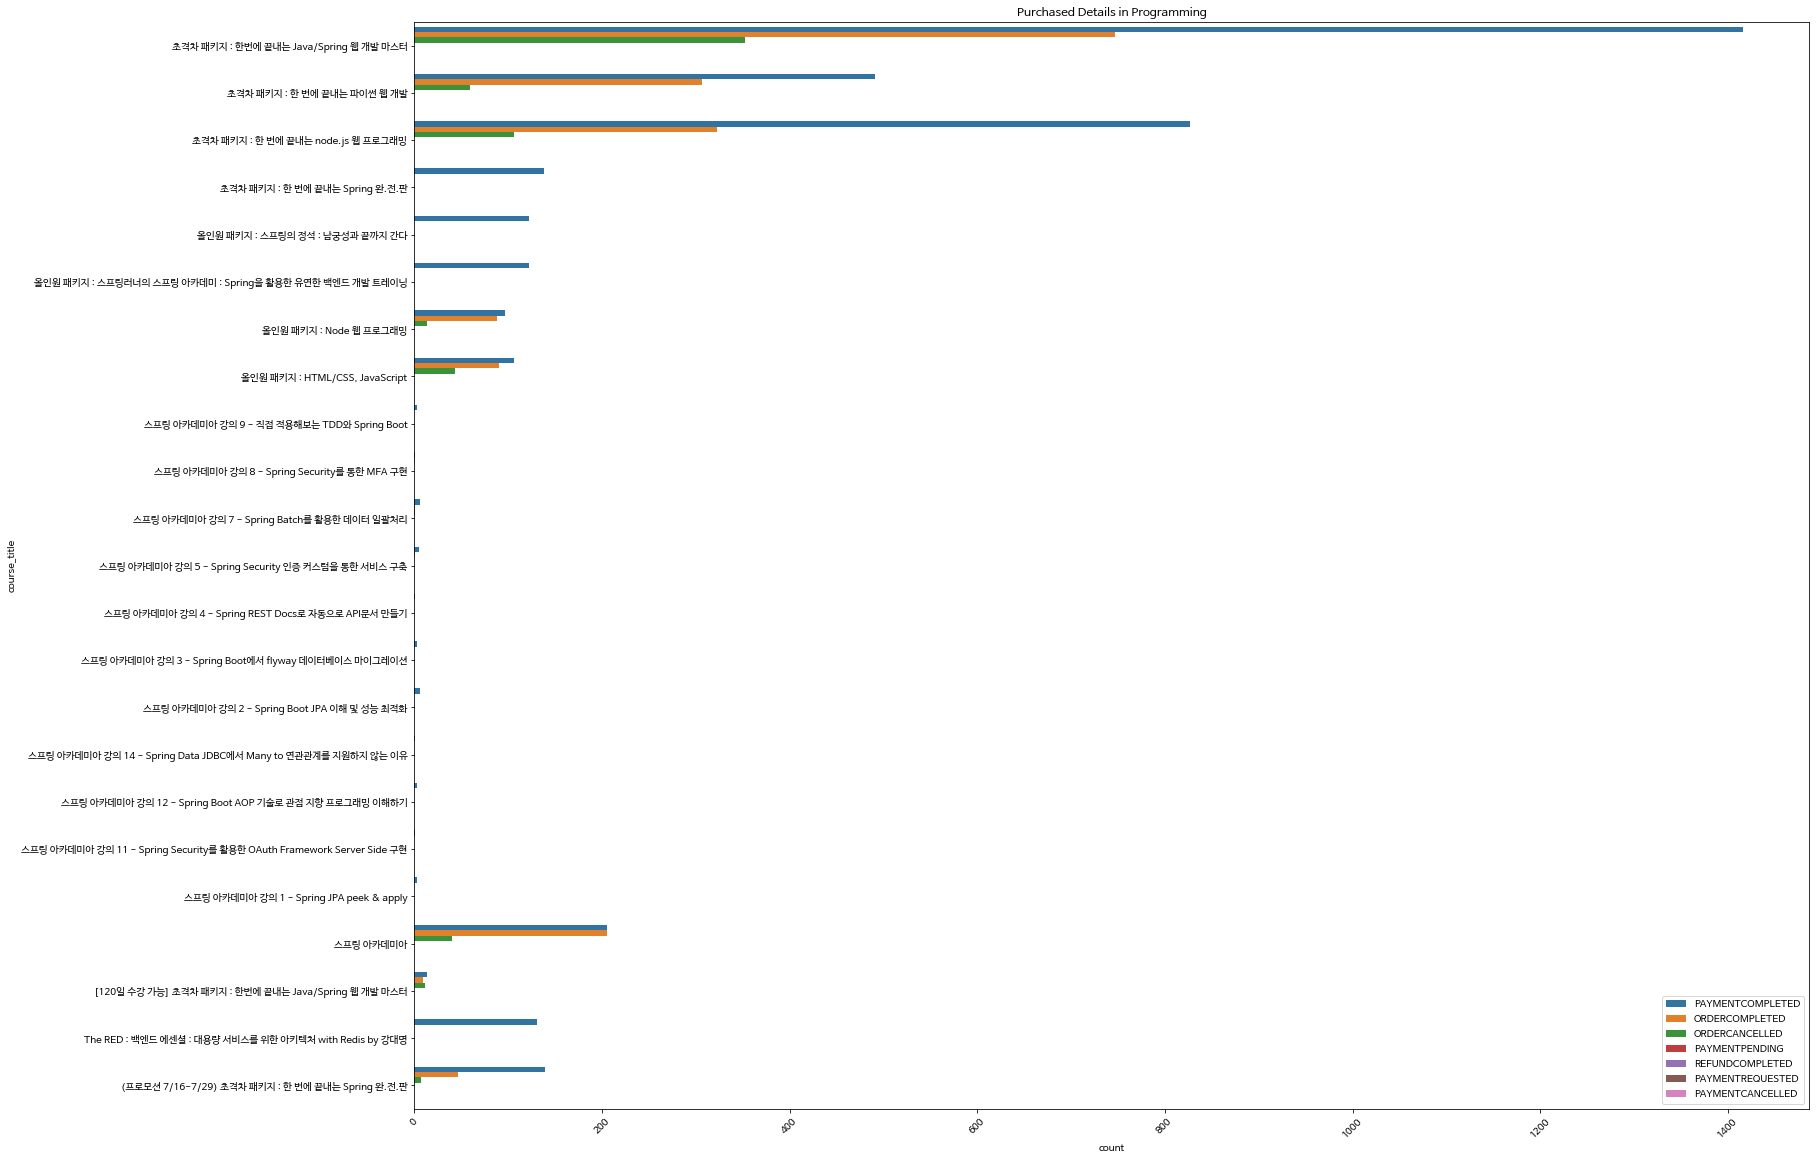

In [ ]:
# 프로그래밍 중에서 비율이 가장 높았던 백엔드 개발을 위주로

plt.figure(figsize=(25, 20)) 

sns.countplot(
    y=programming[(programming['subcategory_title'] == '백엔드 개발') & programming['type/state'].isin(['PAYMENTCOMPLETED','ORDERCOMPLETED','ORDERCANCELLED'])].course_title.sort_values(ascending=False),
    hue=programming[programming['subcategory_title'] == '백엔드 개발']['type/state'], #label=programming[programming['subcategory_title'] == '백엔드 개발']['type/state']
)

plt.xticks(rotation=45)
plt.title('Purchased Details in Programming')
plt.legend(loc='lower right')
plt.show()

In [ ]:
# 위의 그래프들을 비교해볼 때, Order-Completed 된 내용들은 거진 Payment-Completed로 이어지기는 하나, 
# 비율상으로는 Order-Completed 의 약 2배가 Payment-Completed 인 것을 확인함.
# 그렇기에 고객의 의사 자체는 비율상의 차이는 있지만 구매를 하겠다고 결정을 하면 바로 구매하는 듯.
# 또한 해당의 Order의 경우, 21년 7월 이후로 데이터가 끊겨있음을 다른 팀원들을 통해 확인하였기에, 
# 전체적인 팀 회의 이후, 구매 의사에 대한 내용은 통합하여 payment를 compelted 한 것과 아닌 것으로 구분하기로 함.

In [ ]:
# 1명의 고객이 FC의 강의를 여러번 구매했을 때, 해당 고객의 구매 횟수 column 위의 윤상현과 같이 작업하여 추가
pcOrder = mk2[mk2['ts_num'] == 0].sort_values(['customer_id','completed_at'])
pcOrder['pc_order'] = pcOrder.sort_values('completed_at').groupby('customer_id').cumcount()+1

In [ ]:
pcOrder.isna().sum() # pc_order 결측치 없음 확인

id                           0
customer_id                  0
course_id                 1612
course_title                 0
category_title               0
format                       0
completed_at                 0
transaction_amount           0
coupon_title                 0
coupon_discount_amount       0
sale_price                   0
pg                        7445
method                       0
subcategory_title            0
marketing_start_at        6996
type/state                   0
ts_num                       0
cate_num                     0
subcate_num                  0
pc_order                     0
dtype: int64

In [ ]:
pcOrder['pc_order'].value_counts() # 몇 회 이상 구매 여부 확인해보기 / 1회 ~ 최대 51회 확인

1    36221
2     7174
3     2263
6     1224
4     1017
5      539
Name: pc_order, dtype: int64

In [ ]:
# 5회 이상 구매는 우수 고객으로서 이후에도 FC의 상품을 구매할 가능성이 높은 고객으로서 인지, 분석을 위해 6 이상은 6으로 통일
pcOrder['pc_order'] = pcOrder['pc_order'].replace([list(range(6,52))],6)

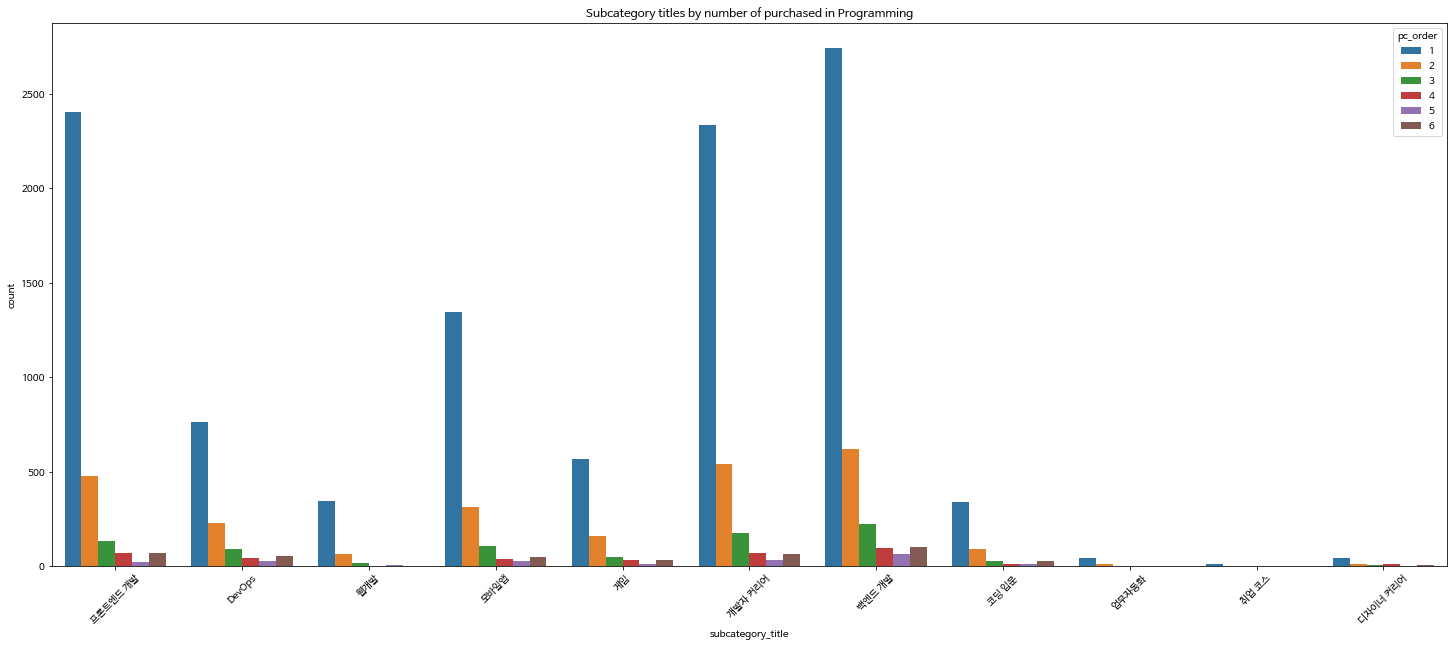

In [ ]:
# 역시나 가장 높은 비율인 프로그래밍 중 구매 횟수에 대한 내용 시각화
plt.figure(figsize=(25,10))
sns.countplot(
    x=pcOrder[pcOrder['cate_num'] == 0]['subcategory_title'].sort_index(),
    hue=pcOrder['pc_order']
)
plt.title('Subcategory titles by number of purchased in Programming')
plt.xticks(rotation=45)
plt.show()

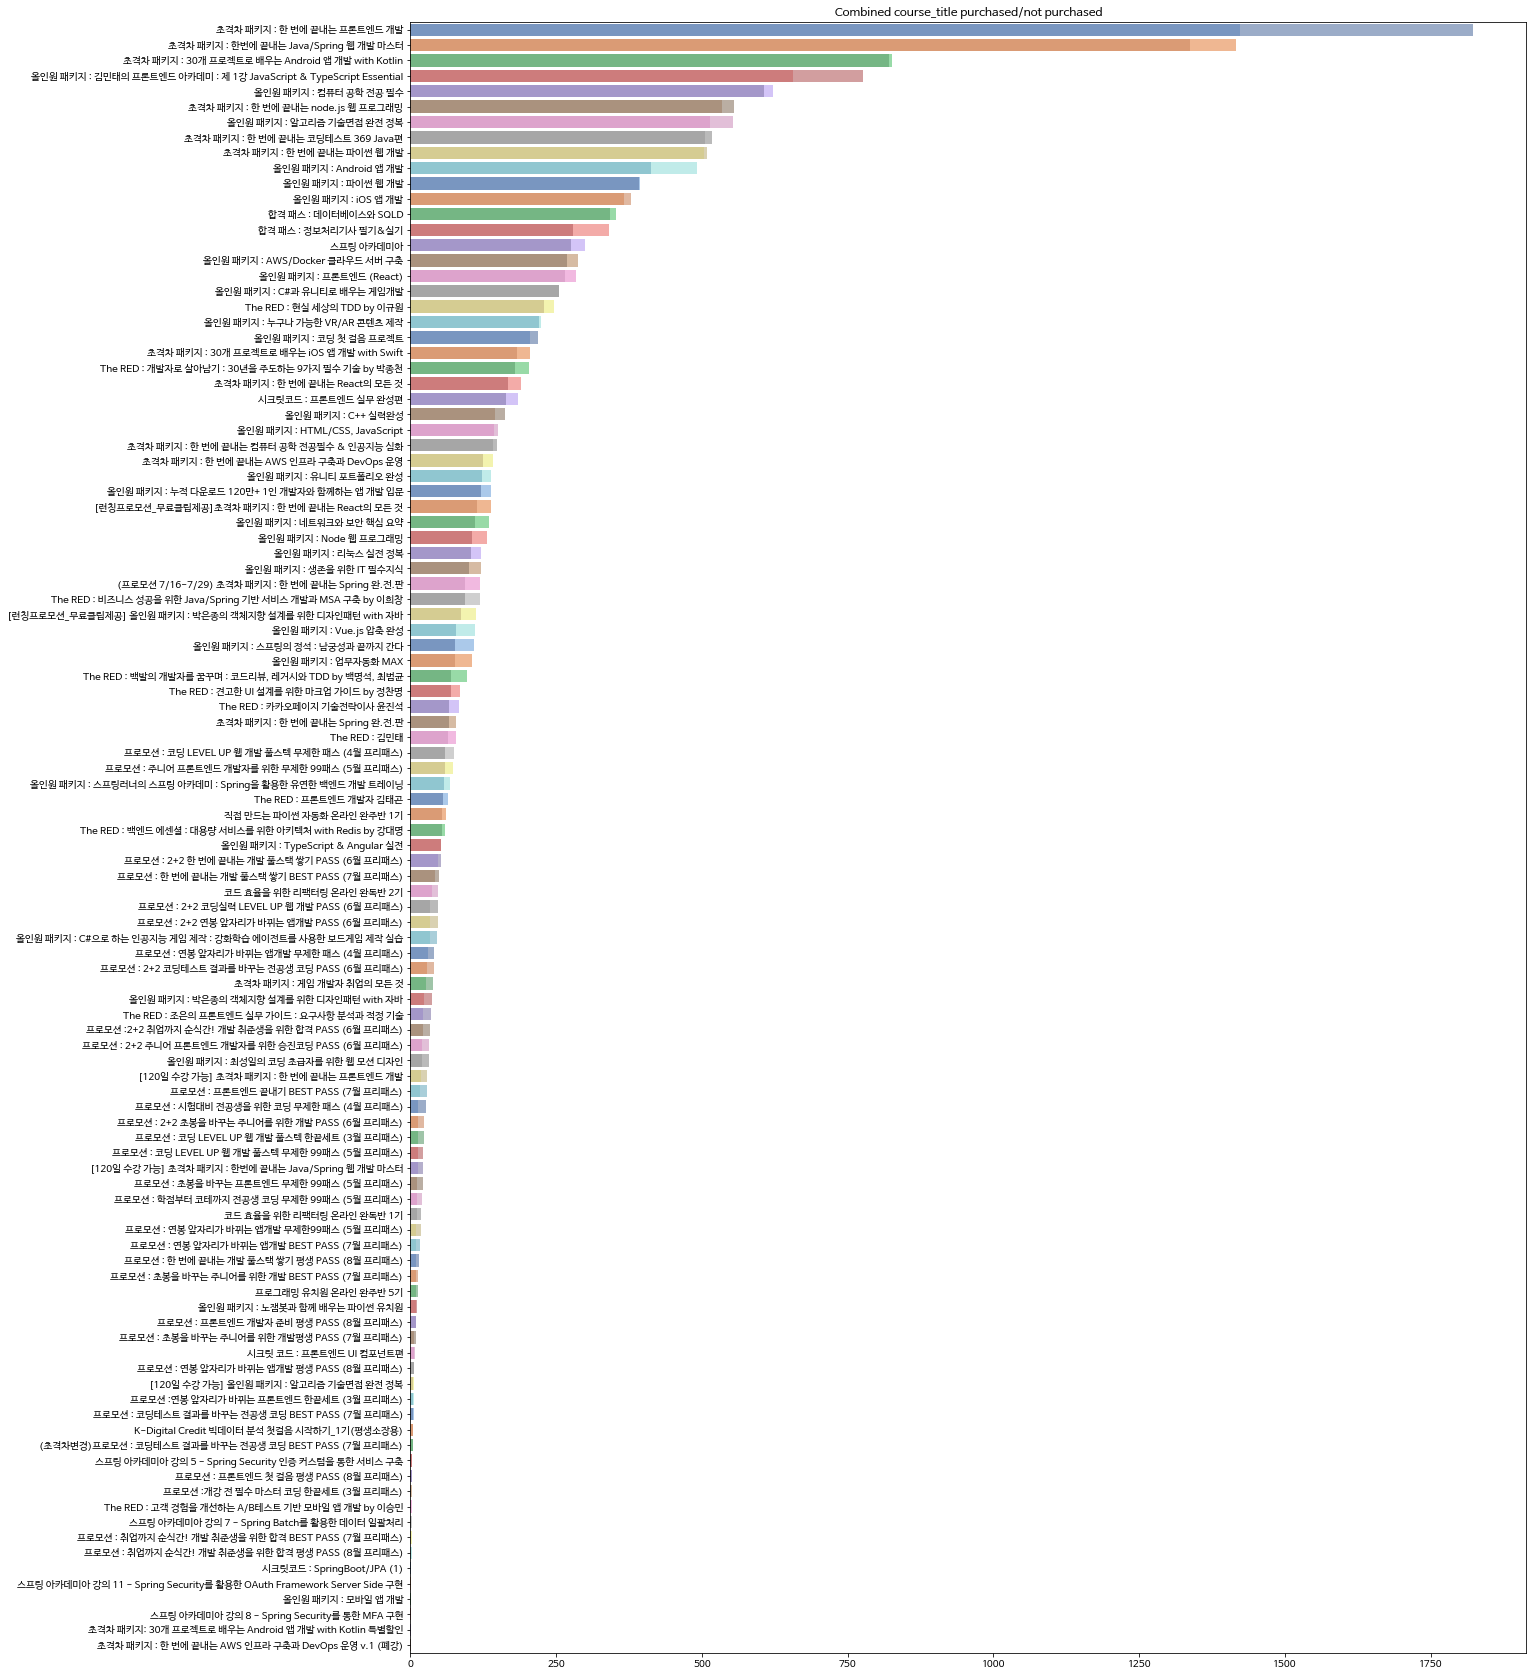

In [ ]:
# 프로그래밍 중 구매 한 것(alpha = 1.0) 과 아닌 것(alpha=0.6) 한번에 겹쳐보기
plt.figure(figsize=(20,30))
plt.title('Combined course_title paymenet_completed and payment_cancelled')

sns.barplot(y=mk2[(mk2['ts_num'] == 0) & (mk2[mk2['cate_num'] == 0])].course_title.value_counts().index, x=mk2[(mk2['ts_num'] == 0) & (mk2[mk2['cate_num'] == 0])].course_title.value_counts().values, palette='pastel', alpha=1.0, label='Purchased')
sns.barplot(y=mk2[(mk2['ts_num'] == 3) & (mk2[mk2['cate_num'] == 0])].course_title.value_counts().index, x=mk2[(mk2['ts_num'] == 3) & (mk2[mk2['cate_num'] == 0])].course_title.value_counts().values, palette='deep', alpha=0.6, label='Not Purchased')

plt.show()

In [ ]:
# 프로그래밍 중 제일 잘 팔리는 & 가장 많이 구매하지 않는 상위는 초격차 패키지와 올인원 패키지임을 확인할 수 있음. 
package = mk2[mk2['course_title'].str.contains('패키지')] # 76910 rows × 17 columns
#package
package = package.drop(['type','state','pg','method'], axis=1)
# 해당 패키지는 많이 팔린 만큼 1번만 구매되었을까?

In [ ]:
package

,id,customer_id,course_id,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,subcategory_title,marketing_start_at,type/state
0,970634,504760,201435.0,올인원 패키지 : 알고리즘 기술면접 완전 정복,프로그래밍,올인원,2021-03-28 15:00:11,90500,coupon_applied,20000,110500,개발자 커리어,NaT,0
1,970650,432862,203178.0,초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,영상/3D,올인원,2021-03-28 15:16:53,96000,coupon_applied,20000,116000,영상 편집,2020-12-02,0
4,970658,478028,201797.0,올인원 패키지 : 직장인 필수 스킬 3종 세트 MAX,업무생산성,올인원,2021-03-28 15:21:54,97500,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000,117500,PPT/보고서,2019-11-14,1
5,970655,478028,201797.0,올인원 패키지 : 직장인 필수 스킬 3종 세트 MAX,업무생산성,올인원,2021-03-28 15:21:56,97500,coupon_applied,20000,117500,PPT/보고서,2019-11-14,0
7,970664,460730,200622.0,올인원 패키지 : 기업가치 평가와 M&A 전략 실무,부동산/금융,올인원,2021-03-28 15:25:42,112500,coupon_applied,10000,122500,금융/투자 실무,2019-05-02,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97535,1364969,669238,204286.0,초격차 패키지 : 한번에 끝내는 3D 디자인 툴,디자인,올인원,2021-09-25 13:39:26,212000,[미래투자금] 온라인 강의 2만원 할인쿠폰,20000,232000,디자인툴,2021-04-23,1
97536,1364976,384003,203178.0,초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,영상/3D,올인원,2021-09-25 13:46:29,149000,coupon_unapplied,0,149000,영상 편집,2020-12-02,1
97537,1364991,670891,203935.0,초격차 패키지 : 한 번에 끝내는 파이썬 웹 개발,프로그래밍,올인원,2021-09-25 14:01:26,159000,[미래투자금] 온라인 강의 2만원 할인쿠폰,20000,179000,백엔드 개발,2021-05-31,1
97538,1364995,640697,205365.0,초격차 패키지 : 한 번에 끝내는 유튜브 크리에이터 되기,영상/3D,올인원,2021-09-25 14:10:42,96000,[WELCOME] 온라인 강의 2만원 할인쿠폰,20000,116000,영상 편집,2021-06-15,0


In [ ]:
# 이후는 팀 공통으로 윤상현&오세연의 구매 횟수, 프로그래밍 위주로 확인해보기로 함.

In [ ]:
# 1명의 고객이 FC의 강의를 여러번 구매했을 때, 해당 고객의 구매 횟수 column 위의 윤상현과 같이 작업하여 추가
pcOrder = mk2[mk2['ts_num'] == 0].sort_values(['customer_id','completed_at'])
pcOrder['pc_order'] = pcOrder.sort_values('completed_at').groupby('customer_id').cumcount()+1

In [ ]:
pcOrder.isna().sum() # pc_order 결측치 없음 확인

id                           0
customer_id                  0
course_id                  159
course_title                 0
category_title               0
format                       0
completed_at                 0
transaction_amount           0
coupon_title                 0
coupon_discount_amount       0
sale_price                   0
subcategory_title            0
marketing_start_at        3879
type/state                   0
pc_order                     0
dtype: int64

In [ ]:
pcOrder['pc_order'].value_counts() # 몇 회 이상 구매 여부 확인해보기 / 1회 ~ 최대 44회 확인

1     29400
2      5525
3      1637
4       690
5       371
6       214
7       126
8        85
9        61
10       39
12       27
11       27
13       22
14       17
15       14
16       14
17       13
18       13
19       12
20       12
22       10
23       10
21       10
24        9
25        8
26        7
27        6
28        5
29        5
30        5
31        5
32        4
38        3
41        3
40        3
39        3
34        3
37        3
36        3
35        3
33        3
42        1
43        1
44        1
Name: pc_order, dtype: int64

In [ ]:
# 5회 이상 구매는 우수 고객으로서 이후에도 FC의 상품을 구매할 가능성이 높은 고객으로서 인지, 분석을 위해 6 이상은 6으로 통일
pcOrder['pc_order'] = pcOrder['pc_order'].replace([list(range(6,52))],6)

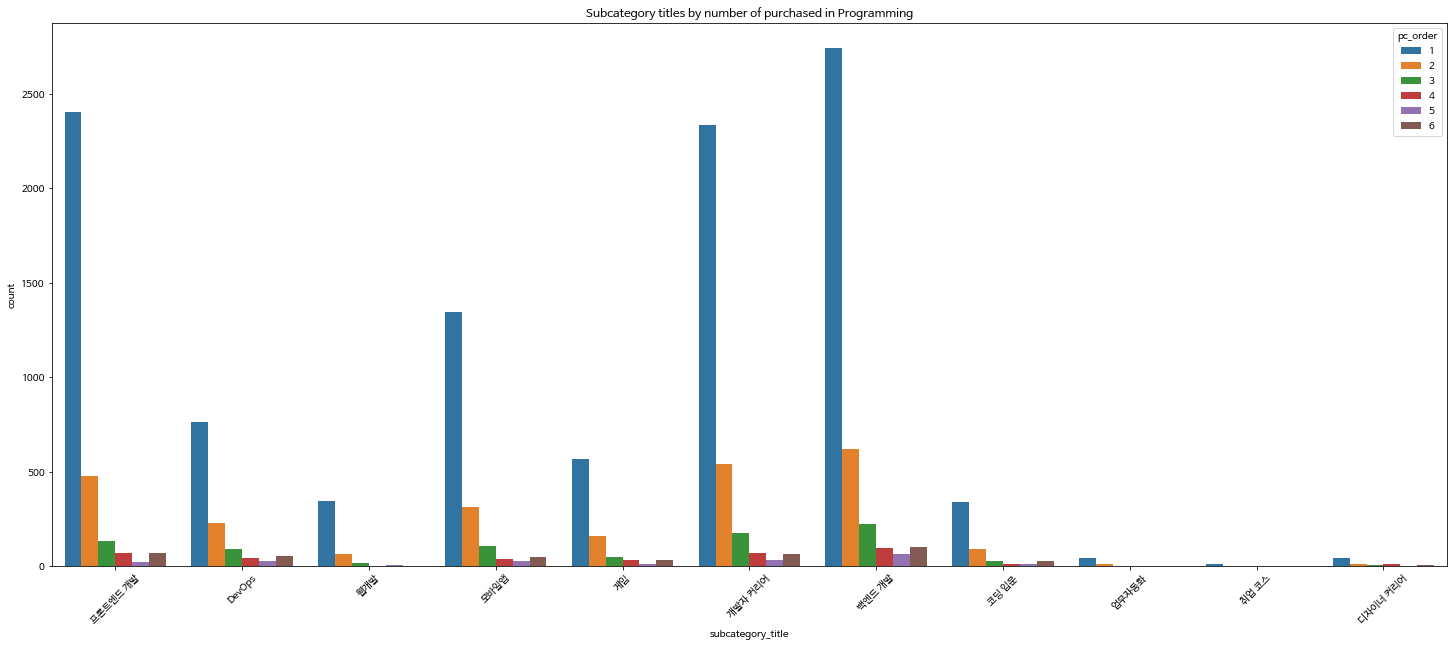

In [ ]:
# 역시나 가장 높은 비율인 프로그래밍 중 구매 횟수에 대한 내용 시각화
plt.figure(figsize=(25,10))
sns.countplot(
    x=pcOrder[pcOrder['cate_num'] == 0]['subcategory_title'].sort_index(),
    hue=pcOrder['pc_order']
)
plt.title('Subcategory titles by number of purchased in Programming')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# 1회 구매의 경우, 추가적인 구매를 유도할 수 있는 고객으로 보고,
# 이들에게 추가 혹은 연관 구매를 유도하기 위해서 2회 이상 구매된 내역을 위주로 확인해 보기로 함.

In [ ]:
# 2회 이상으로 시각화 하여 보기
two = pcOrder[pcOrder['pc_order'] > 1]
# two # 9033 rows × 15 columns
two['course_title'].value_counts()

초격차 패키지 : 한 번에 끝내는 node.js 웹 프로그래밍                     245
초격차 패키지 : 한 번에 끝내는 프론트엔드 개발                            221
초격차 패키지 : 한 번에 끝내는 파이썬 웹 개발                            172
초격차 패키지 : 한번에 끝내는 영상 촬영과 편집                            168
초격차 패키지 : 한번에 끝내는 Java/Spring 웹 개발 마스터                 162
                                                      ... 
프로모션 : 워라밸을 완성하는 직장인 필수스킬 벼락치기 패키지 (9월 프리패스)             1
프로모션 : 주니어 UX/UI 디자이너를 위한 실전 디자인 벼락치기 패키지 (9월 프리패스)      1
[120일 수강 가능] 초격차 패키지 : 한 번에 끝내는 데이터 분석 툴                 1
[120일 수강 가능] 초격차 패키지 : 한 번에 끝내는 엑셀 실무                    1
[한정판매] 자연어처리 끝장 패키지(~8월)                                 1
Name: course_title, Length: 199, dtype: int64

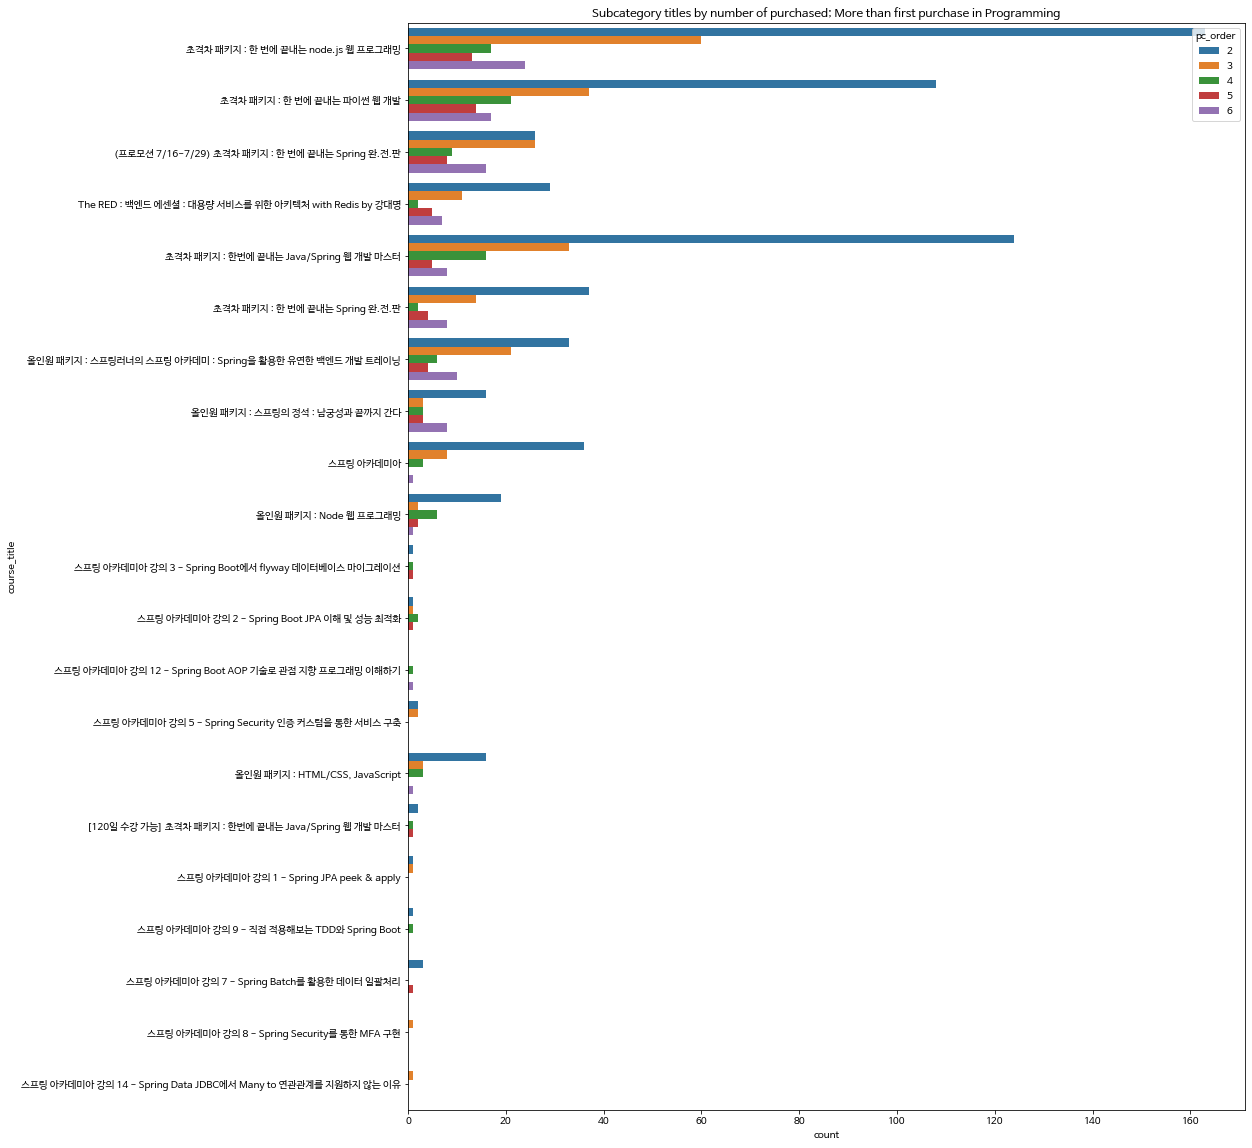

In [ ]:
plt.figure(figsize=(15,20))
sns.countplot(
    y=two[two['subcate_num'] == 1]['course_title'],
    hue=two['pc_order']
)
plt.title('Subcategory titles by number of purchased; More than first purchase in Programming')
plt.show()

In [ ]:
# 애매한 결론이기는 하나, 대부분 프로그래밍의 백엔드 개발을 위주로 봤을 때, 초격자 패키지 및 올인원 패키지가 1회 구매 및 그 이상을 노릴 수 있는 가능성이 높은 바,
# 다른 프로그래밍 파트에서도 해당의 패키지들을 연계 상품으로서 추천하거나 해당의 상품을 시계열 데이터와 결합하여 많이 구매하는 분기나 월별에 약간의 push를 준다면 구매율을 높일 수 있지 않을까 하는 결론을 내었다.

##마케팅 팀의 공통 취합
- 카테고리와 구매확정(Payment Completed)에대 겹치는 내용이 많아서 분석 중 마케팅 팀의 공통적 방향을 잡기 위해 서로의 내용 중 취합할 수 있는 내용들을 취합하기로 함.
- 이후 시계열 데이터와 같이 취합하여 함.


### How to?  
1. 각자의 카테고리 분석에 파고들어서 개개인의 인사이트 도출 후 취합
2. 고객의 의도에서 실질 구매로 이어진 내용들을 말미암아 추가 구매 혹은 추천할 수 있는 방향으로 결론 도출


### 취합

---

# 손실분석

## 가설

- 회사에서 일반적으로 손실로 인지되는 것은, 판매된 상품의 구매가 취소되거나 판매된 물건이 환불되는 것을 일컫습니다. 손실분석 팀에서는 고객이 상품 구매를 취소하거나 환불하는 배경에는 무엇이 있을지 확인해 보는 것을 주 목적으로 잡고 손실에 대한 분석을 해보기로 했습니다. 

 예를 들어서, 어떤 특정 카테고리의 강의들은 유독 환불이나 구매 취소가 높을 수 있는데 그 사유가 따로 있을 지, 그 사유가 금액 때문이거나 혹은 더 좋은 상품을 찾아서거나, 아니면 다른 사유가 있는지 등 개인의 마음을 알 수 있는 건 아니지만 그 사유를 이끄는 배경을 데이터를 분석함으로써 해당 예시의 가능성에 대해 알아볼 수 있도록 이를 가설의 주제로 잡고 방향을 진행하기로 했습니다.


##김지혜
- category_title 중 프로그래밍을 중심으로 분석하였음. 
-  프로그래밍의 subcategory_title 분석 중 coupon 할인 여부에 대해 파고들기로 함.


### How to?  
1. type 데이터 중 ORDER_CANCELLED + PAYMENT_CANCELLED 묶음
2. 카테고리 별 환불, 구매취소 건 수 비교
3. 프로그래밍 강의의 할인 여부 별 환불, 구매취소 비교 
4. 프로그래밍 subcategory_title 별 type 비교

In [ ]:
# 김지혜 rs1 으로 진행
rs1 = rs.copy()
# rs1

In [ ]:
# order cancelled 중복 제거
mo = rs1[(rs1['type']=='ORDER') & (rs1['state']=='CANCELLED')].copy()
mo = mo.drop_duplicates(['customer_id','course_title'], keep='last')

In [ ]:
# PENDING drop
rs1 = rs1.drop(rs1[(rs1.state =='PENDING') | (rs1.state=='REQUESTED')].index, axis=0)

In [ ]:
# 새로운 열 추가 후 order cancelled, payment cancelled 묶음
conditionlist = [
    ((rs1['type'] == 'ORDER') | (rs1['type'] == 'PAYMENT')) & (rs1['state'] == 'CANCELLED') ,
    (rs1['type'] == 'REFUND') & (rs1['state'] == 'COMPLETED')]
choicelist = ['ORDER_CANCELLED', 'REFUND']
rs1['type_state'] = np.select(conditionlist, choicelist, default='PAYMENT_COMPLETED')

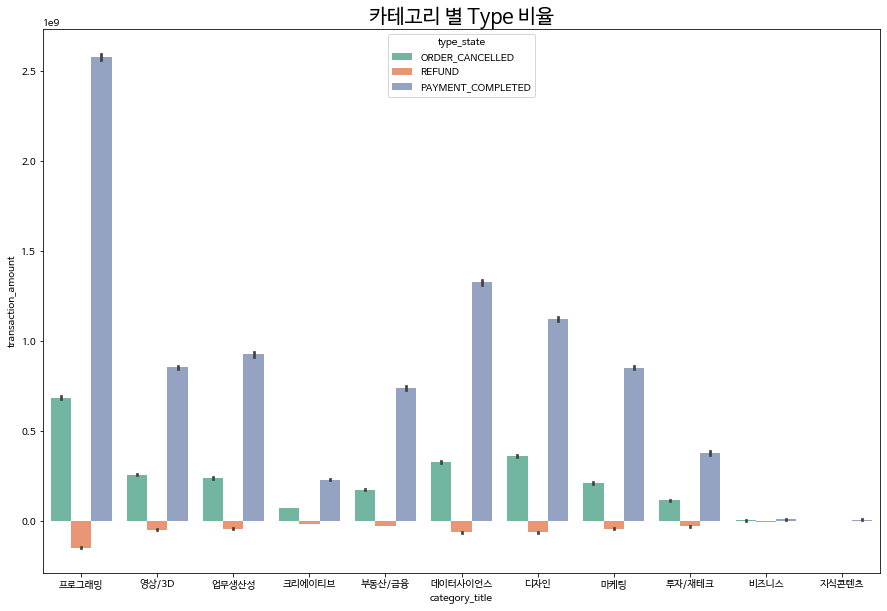

In [ ]:
from seaborn.categorical import barplot
# 전체 통계 ⟶ 카테고리별 type의 비율 ()
from collections import Counter
plt.figure(figsize=(15,10))
plt.title('카테고리 별 Type 비율', fontsize=20)
ax = sns.barplot(data=rs1, x = 'category_title', y ='transaction_amount', estimator=np.sum,  hue = 'type_state', hue_order=['ORDER_CANCELLED', 'REFUND','PAYMENT_COMPLETED'],palette='Set2')

plt.show()   

In [ ]:
# pay or not
'''
이익 =
payment completed 구매확정 earning

손실 =
order cancelled 고객 유치 실패 
payment cancelled 고객 유치 실패
refund completed 환불
'''
# PAYMENT completed
tp = rs1[(rs1['type']=='PAYMENT') & (rs1['state']=='COMPLETED')]
# PAYMENT cancelled
tc = rs1[(rs1['type']=='PAYMENT') & (rs1['state']=='CANCELLED')]
# PAYMENT refund
tr = rs1[rs1['type']=='REFUND']
# Order cancelled
to = rs1[(rs1['type']=='ORDER') & (rs1['state']=='CANCELLED')].copy()
to = to.drop_duplicates(['customer_id','course_title'], keep='last')

In [ ]:
tpl = list(tp.id) 
TP = rs1[rs1.id.isin(tpl)] # PAYMENT completed
tcl = list(tc.id)+ list(to.id)
TC = rs1[rs1.id.isin(tcl)] # PAYMENT cancelled / Order cancelled
trl = list(tr.id)
TR = rs1[rs1.id.isin(trl)]# PAYMENT refund

In [ ]:
aj = tcl + trl
ALL = rs1[rs1.id.isin(aj)==True]  # ALL

In [ ]:
ALL.type[ALL.id.isin(list(to.id))==True] = 'PAYMENT' # order cancelled -> payment cancelled

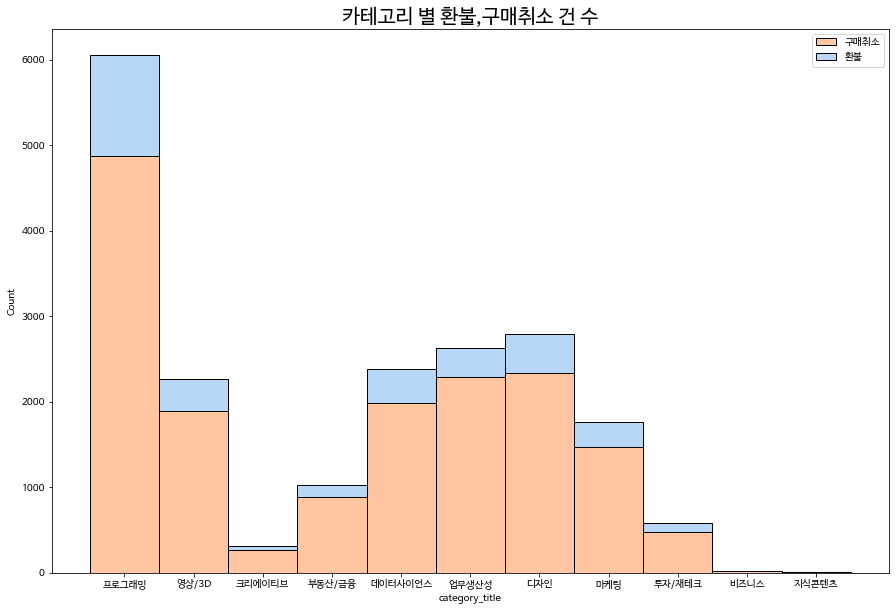

In [ ]:
# 전체 통계 ⟶ 카테고리별 type 중 REFUND, PAYMENT_CANCELLED 비교

plt.figure(figsize=(15,10))
plt.title('카테고리 별 환불,구매취소 건 수', fontsize=20)
sns.histplot(data=ALL, x='category_title',hue=ALL[['type', 'state']].apply(tuple, axis=1), hue_order= [('REFUND','COMPLETED'),('PAYMENT','CANCELLED')], multiple='stack',palette='pastel')
plt.legend(labels = ['구매취소','환불'])

In [ ]:
ALL['coupon'] = 'x'

In [ ]:
ALL.coupon[ALL.coupon_discount_amount == 0 ]= '할인미적용'

In [ ]:
ALL.coupon[ALL.coupon_discount_amount > 0 ] = '할인적용'

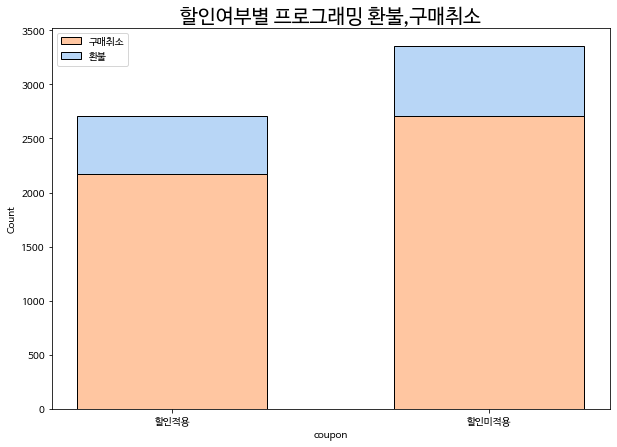

In [ ]:
# 프로그래밍 할인 여부에 따른 REFUND,PAYMENT_CANCELLED 비교
plt.figure(figsize=(10,7))
plt.title('할인여부별 프로그래밍 환불,구매취소', fontsize=20)
sns.histplot(data=ALL[ALL.category_title=='프로그래밍'],x = 'coupon', hue=ALL[['type', 'state']].apply(tuple, axis=1),hue_order= [('REFUND','COMPLETED'),('PAYMENT','CANCELLED')],multiple = 'stack',shrink = 0.6, palette='pastel')
plt.legend(labels = ['구매취소','환불'])

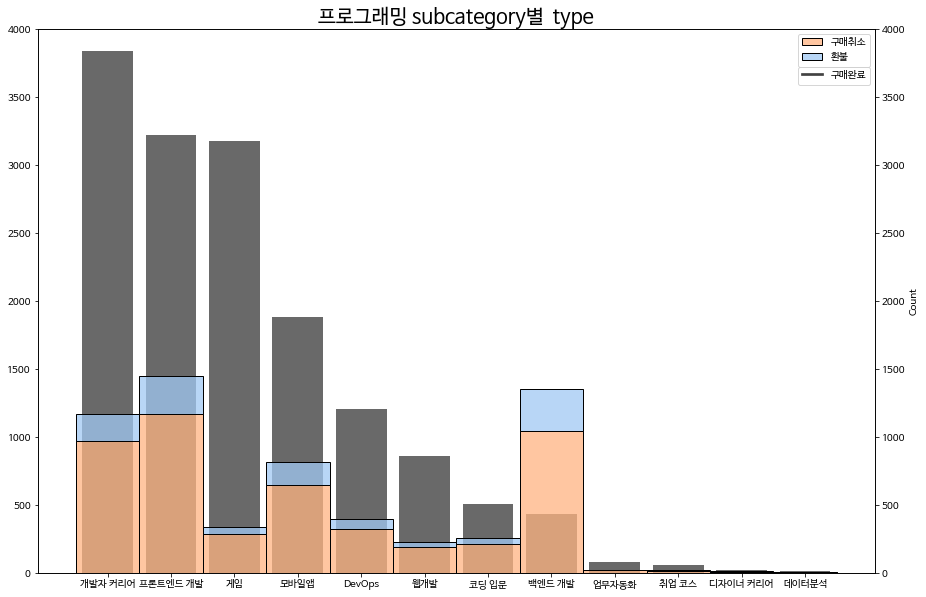

In [ ]:
# 프로그래밍 subcategory별  type 그래프 그리기
R = TP.subcategory_title[TP.category_title=='프로그래밍']
fig, ax1 = plt.subplots(figsize=(15,10))
plt.title('프로그래밍 subcategory별  type', fontsize=20)


sns.barplot(color='dimgray',data=R, x=R.value_counts().index, y=R.value_counts().values, ax = ax1)
ax1.set_ylim(0, 4000)
plt.legend(labels = ['구매완료'],bbox_to_anchor=(1.0,0.94))

ax2 = ax1.twinx()
sns.histplot(data=ALL[ALL.category_title=='프로그래밍'],x='subcategory_title', hue=ALL[['type', 'state']].apply(tuple, axis=1),hue_order= [('REFUND','COMPLETED'),('PAYMENT','CANCELLED')],multiple='stack',ax = ax2,palette= 'pastel')
ax2.set_ylim(0, 4000)
plt.legend(labels = ['구매취소','환불','구매완료'])


plt.show()

##권민경
- 환불(데이터프레임.type='REFUND')위주로 분석하였음. 
- 구매한 강의와 환불한 강의를 대조적으로 파악하여 왜 강의가 환불됬는지의 이유를 추론해보는 방향으로 진행하였습니다.  


### How to?  
1. 데이터 중 칼럼타입이 환불(refund)인 데이터를 추출 (df.type == 'REFUND')
2. 환불 데이터의 수를 파악하고, 특성을 파악
3. 환불 데이터의 특성과 구매가 완료된 데이터들의 특성을 대조
4. 데이터 시각화

In [ ]:
# 권민경 rs2 으로 진행
rs2 = rs.copy()
# rs2

In [ ]:
rs2.type.unique() #타입의 unique 값

array(['ORDER', 'PAYMENT', 'REFUND'], dtype=object)

In [ ]:
rs2[(rs2.type == 'REFUND')&(rs2.transaction_amount <= 0)] ## type 컬럼이 refund 인 것은 transaction amount 가 0 이거나 0보다 작기 때문에 사용하고싶은 데이터가 맞는지 확인

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,pg,method,subcategory_title,marketing_start_at
586,972381,472666,203178.0,REFUND,COMPLETED,초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,영상/3D,올인원,2021-03-29 09:26:13,-96000,REFUND,20000,116000,NaN,CARD,영상 편집,2020-12-02 00:00:00
600,972409,447177,203989.0,REFUND,COMPLETED,올인원 패키지 : 소금툰과 함께 캐릭터 드로잉/굿즈/임티/컷툰,디자인,올인원,2021-03-29 09:40:54,-79000,REFUND,10000,89000,NaN,CARD,일러스트,2021-02-19 00:00:00
605,972422,373915,204264.0,REFUND,COMPLETED,데이터분석 프로젝트+자격증 온라인 완주반 3기,데이터사이언스,온라인 완주반,2021-03-29 09:44:01,-340000,REFUND,0,340000,NaN,VBANK,데이터분석,2021-03-08 00:00:00
608,972436,456086,NaN,REFUND,COMPLETED,프로모션 :연봉 앞자리가 바뀌는 프론트엔드 한끝세트 (3월 프리패스),프로그래밍,올인원,2021-03-29 09:47:17,-299000,REFUND,0,299000,NaN,CARD,프론트엔드 개발,NaT
609,972440,469406,202547.0,REFUND,COMPLETED,올인원 패키지 : Financial Modeling,부동산/금융,올인원,2021-03-29 09:48:29,-125000,REFUND,20000,145000,NaN,CARD,금융/투자 실무,2020-04-17 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97326,1363704,670215,204670.0,REFUND,COMPLETED,The RED : 김영하 작가의 내 안의 숨은 이야기를 찾아 쓰는 법,마케팅,RED,2021-09-24 14:32:43,-171000,REFUND,0,171000,NAVER,TRANS,글쓰기/카피라이팅,2021-06-18 17:00:00
97327,1363708,600073,206065.0,REFUND,COMPLETED,(프로모션 7/16-7/29) 초격차 패키지 : 한 번에 끝내는 Spring 완.전.판,프로그래밍,올인원,2021-09-24 14:34:50,-149000,REFUND,30000,179000,NAVER,CARD,백엔드 개발,2021-07-15 00:00:00
97351,1363934,506356,206720.0,REFUND,COMPLETED,용호수의 돈 버는 실전 영상 제작,영상/3D,올인원,2021-09-24 16:10:55,-259000,REFUND,0,259000,NAVER,CARD,영상 편집,2021-08-17 00:00:00
97389,1364149,604077,205569.0,REFUND,COMPLETED,올인원 패키지 : 공여사와 무작정 풀어보는 엑셀 실무,업무생산성,올인원,2021-09-24 17:09:30,-109000,REFUND,20000,129000,KAKAO,POINT,엑셀/VBA,2021-08-17 00:00:00


In [ ]:
rs2[rs2.type == 'REFUND'].info() #데이터의 정보 확인 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3344 entries, 586 to 97392
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   id                      3344 non-null   int64         
 1   customer_id             3344 non-null   int64         
 2   course_id               3214 non-null   float64       
 3   type                    3344 non-null   object        
 4   state                   3344 non-null   object        
 5   course_title            3344 non-null   object        
 6   category_title          3344 non-null   object        
 7   format                  3344 non-null   object        
 8   completed_at            3344 non-null   datetime64[ns]
 9   transaction_amount      3344 non-null   int64         
 10  coupon_title            3344 non-null   object        
 11  coupon_discount_amount  3344 non-null   int64         
 12  sale_price              3344 non-null   int64

In [ ]:
rs2[rs2.type == 'REFUND'].isnull().sum() #결측치를 확인해봄

id                          0
customer_id                 0
course_id                 130
type                        0
state                       0
course_title                0
category_title              0
format                      0
completed_at                0
transaction_amount          0
coupon_title                0
coupon_discount_amount      0
sale_price                  0
pg                        404
method                      0
subcategory_title           0
marketing_start_at        466
dtype: int64

In [ ]:
len(rs2[rs2.type == 'REFUND'].customer_id.unique()) # 사용자 아이디가 동일한(같은 사람이 여러 번 환불한 기록) 환불기록도 있을까 하여 추출해봄

2992

세팅

In [ ]:
sns.set(rc = {'figure.figsize':(15,8)})

In [ ]:
# 폰트 나눔바른고딕 지정
plt.rc('font', family='NanumBarunGothic') 

시각화

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


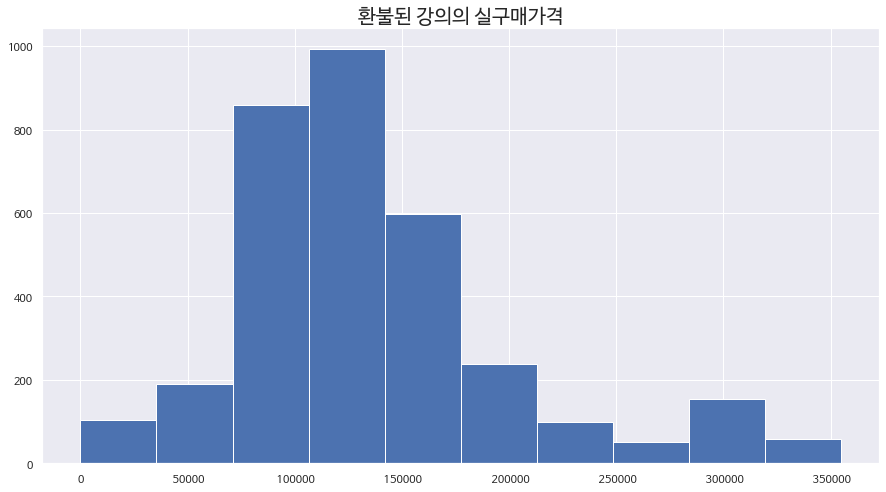

In [ ]:
# 환불된 강의 실제구매가격
fig, ax = plt.subplots()

plt.grid(False)
plt.title('환불된 강의의 실구매가격',fontsize = 20)

rs2.transaction_amount[rs2.type=='REFUND'].hist(ax=ax)
ax.invert_xaxis() ## 이부분 시각화를 오름차순으로 하고싶은데 반대로 나와서 **오균**님께서 도와주셨습니다.
plt.show()

Text(0.5, 0, '가격대')

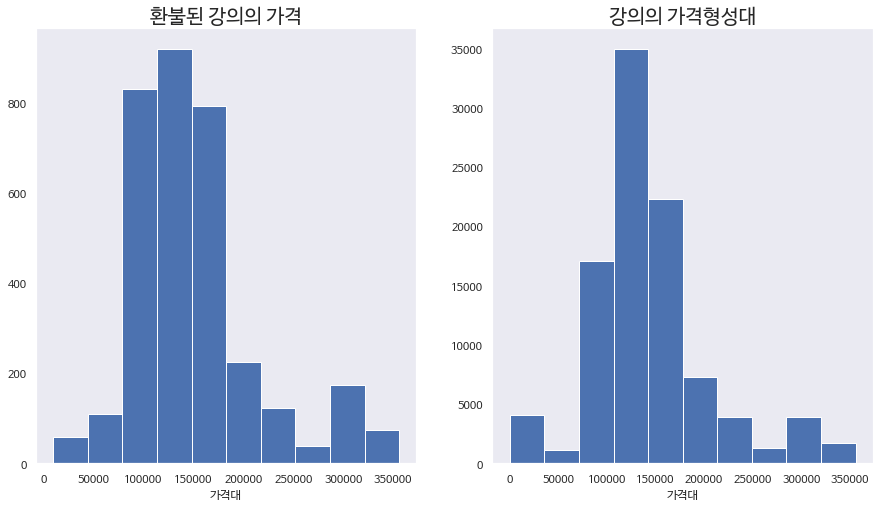

In [ ]:
#환불된 가격 , 강의의 가격형성대 
plt.subplots(1,2)

plt.subplot(1, 2, 1)
rs2.sale_price[rs2.type=='REFUND'].hist()
plt.grid(False)
plt.title('환불된 강의의 가격',fontsize = 20)
plt.xlabel('가격대')


plt.subplot(1, 2, 2)
rs2.sale_price.hist()
plt.grid(False)
plt.title('강의의 가격형성대',fontsize = 20)
plt.xlabel('가격대')

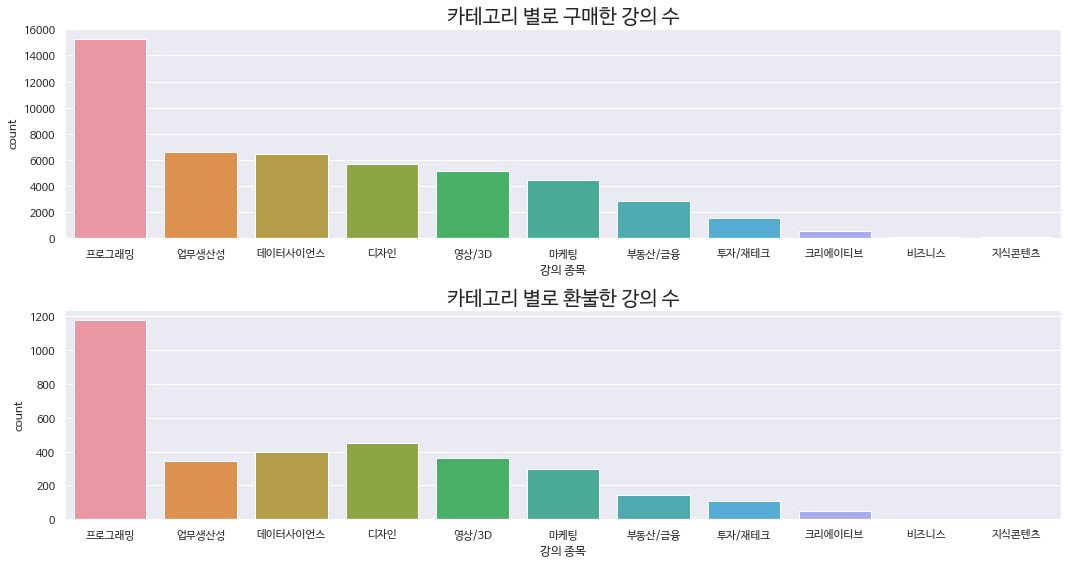

In [ ]:
#plt 카테고리별로 환불 및 구매한 강의 비교
plt.subplots(2)

plt.subplot(2, 1,1)
s = sns.countplot(x= rs2.category_title[(rs2.type == 'PAYMENT')&(rs2.state =='COMPLETED')], data=rs2, order = rs2['category_title'].value_counts().index)
s.set_title("카테고리 별로 구매한 강의 수",fontsize = 20)
plt.xlabel("강의 종목")

plt.subplot(2, 1,2)
s1 = sns.countplot(x= rs2.category_title[rs2.type =='REFUND'], data=rs2, order = rs2['category_title'].value_counts().index)
s1.set_title("카테고리 별로 환불한 강의 수",fontsize = 20)
plt.xlabel("강의 종목")

plt.tight_layout()

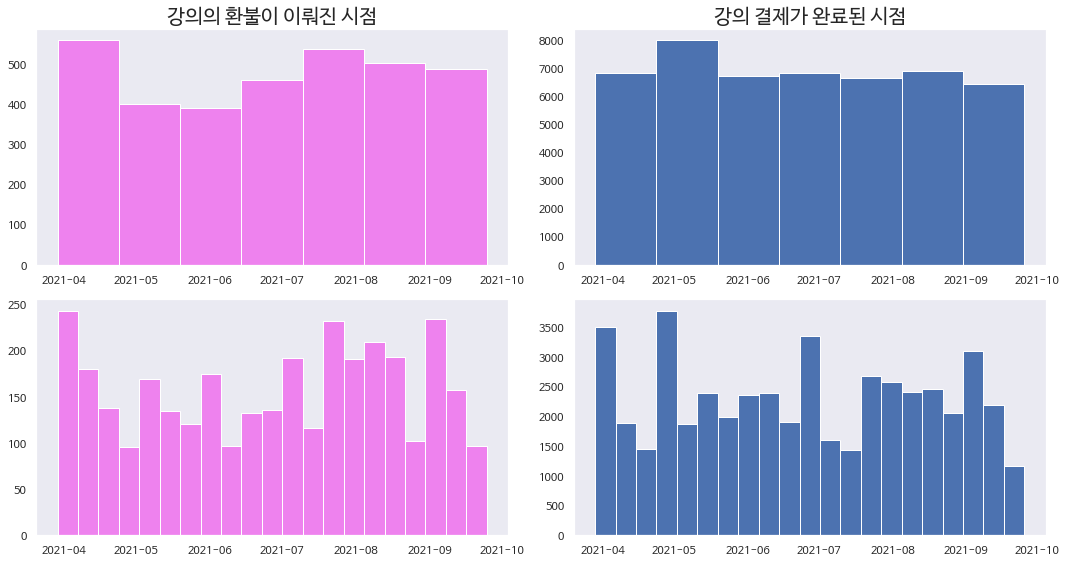

In [ ]:
#강의 환불 및 강의 결제 시점 
plt.subplots(2,2)

plt.subplot(2, 2,1)
rs2.completed_at[rs2.type=='REFUND'].hist(bins=7, color = 'violet')
plt.grid(False)
plt.title('강의의 환불이 이뤄진 시점',fontsize = 20)

plt.subplot(2, 2,2)
rs2.completed_at[(rs2.type == 'PAYMENT')&(rs2.state =='COMPLETED')].hist(bins=7)
plt.grid(False)
plt.title('강의 결제가 완료된 시점',fontsize = 20)

plt.subplot(2, 2,3)
rs2.completed_at[rs2.type=='REFUND'].hist(bins=21, color = 'violet')
plt.grid(False)
#plt.title('강의의 환불이 이뤄진 시점',fontsize = 20)

plt.subplot(2, 2,4)
rs2.completed_at[(rs2.type == 'PAYMENT')&(rs2.state =='COMPLETED')].hist(bins=21)
plt.grid(False)
#plt.title('결제완료된 강의들의 결제 시점',fontsize = 20)

plt.tight_layout()

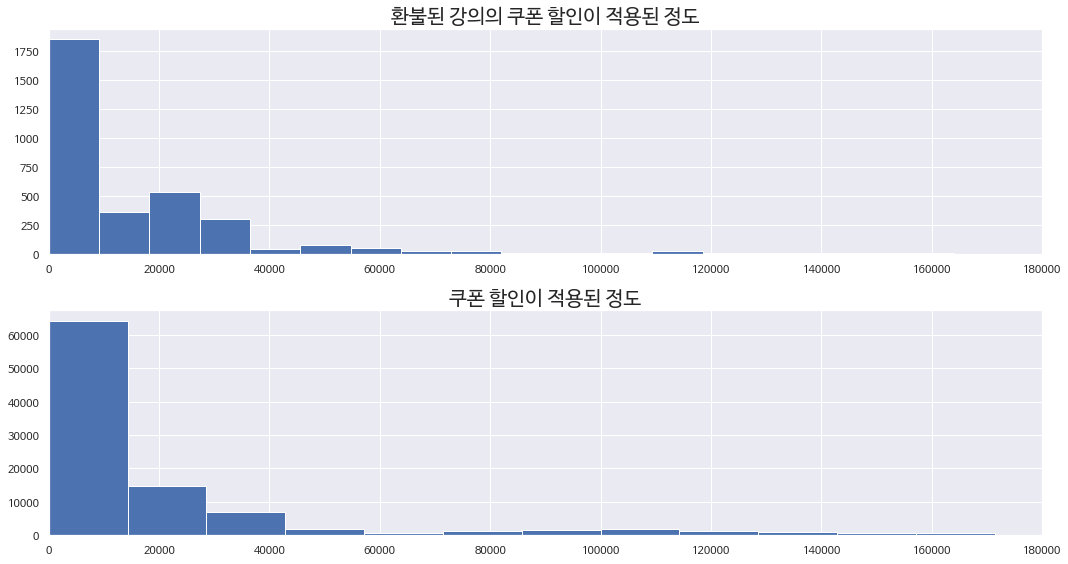

In [ ]:
#쿠폰 적용이 된 정도를 확인해서 환불된 강의가 할인율이 적었는지 확인 
plt.subplots(2)

plt.subplot(2, 1,1)
rs2.coupon_discount_amount[rs2.type=='REFUND'].hist(bins = 35)
#plt.grid(False)
plt.title('환불된 강의의 쿠폰 할인이 적용된 정도',fontsize = 20)
plt.xlim([0, 180000])

plt.subplot(2, 1,2)
rs2.coupon_discount_amount.hist( bins = 35 )
#plt.grid(False)
plt.title('쿠폰 할인이 적용된 정도',fontsize = 20)
plt.xlim([0, 180000])

plt.tight_layout()

스케터 표로 나타내 보고 싶어서 시도 

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


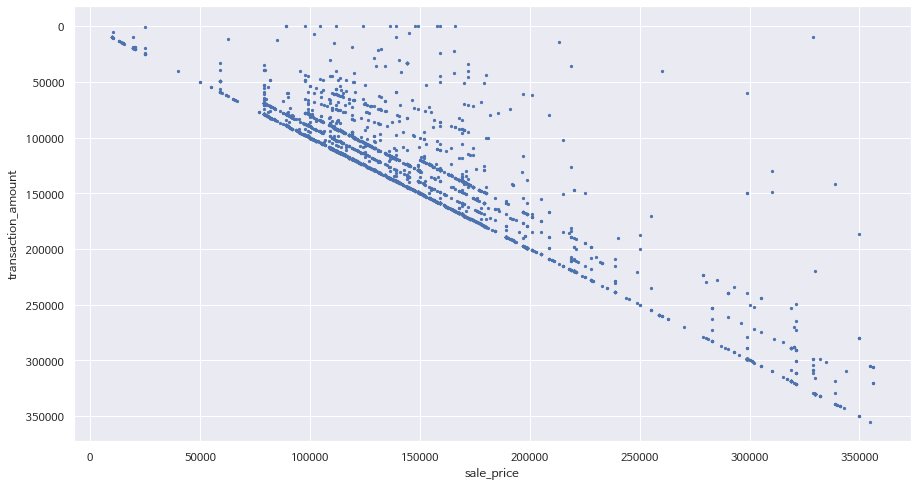

In [ ]:
rs2[rs2.type == 'REFUND'].plot.scatter(x ='sale_price' ,y= 'transaction_amount', s=5)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


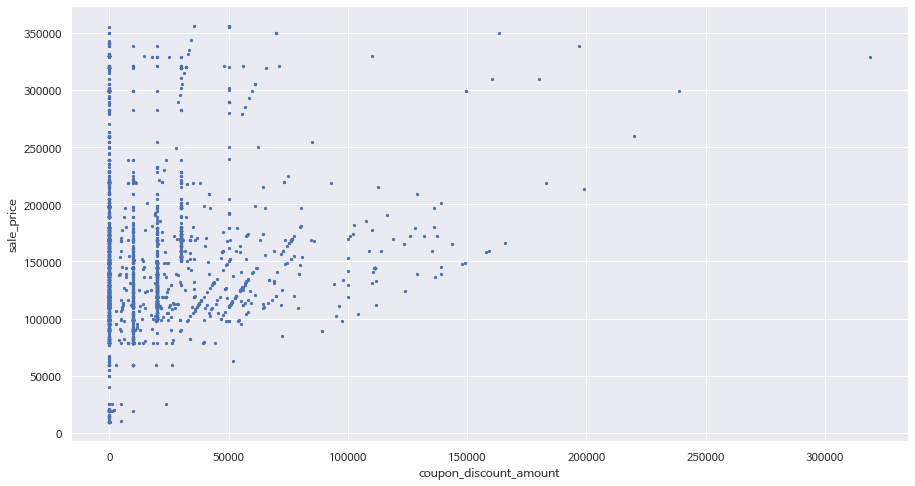

In [ ]:
rs2[rs2.type == 'REFUND'].plot.scatter(x ='coupon_discount_amount' ,y= 'sale_price', s=5)

##권오균
- 회사의 카테고리별 수익과 손실 파악
- 가격과 손실의 상관관계 분석
- 할인율과 구매선택의 상관관계 분석

### How to?  
1. '구매완료', '구매취소', '환불' 로 구분하여, 거래내역을 '수익'과 '손실'로 분류하였습니다.
2. 카테고리별 환불율과 구매취소율을 추합하여, 카테고리별 손실율을 분석하였습니다.
3. 할인 비율을 계산하여, 구매한 경우와 그렇지 않은 경우를 구분하여, 할인율과 구매의 상관관계를 분석하였습니다.

In [ ]:
# 권오균 rs3 으로 진행
rs3 = rs.copy()
# rs3

In [ ]:
aw = tcl + trl + tpl
ALL1 = rs3[rs3.id.isin(aw)==True]  # ALL1
ALL1.type[ALL1.id.isin(list(to.id))==True] = 'PAYMENT'

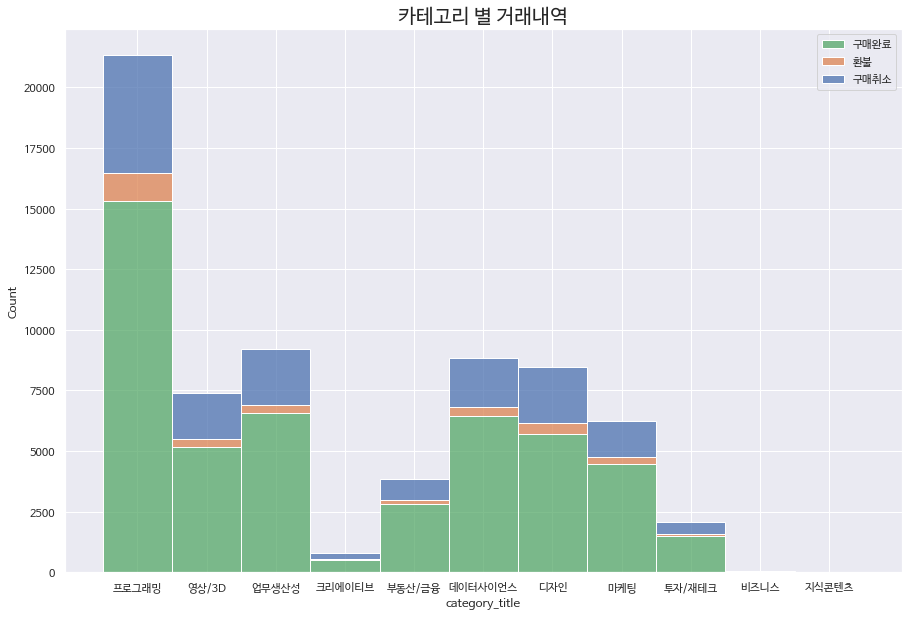

In [ ]:
# 건 수
plt.figure(figsize=(15,10))
plt.title('카테고리 별 거래내역', fontsize=20)
sns.set_palette("deep")
sns.histplot(data=ALL1, x='category_title', hue=ALL1[['type', 'state']].apply(tuple, axis=1), hue_order=[('PAYMENT', 'CANCELLED'), ('REFUND','COMPLETED'),('PAYMENT','COMPLETED')], multiple='stack')
plt.legend(labels=['구매완료', '환불', '구매취소'])
plt.show()           

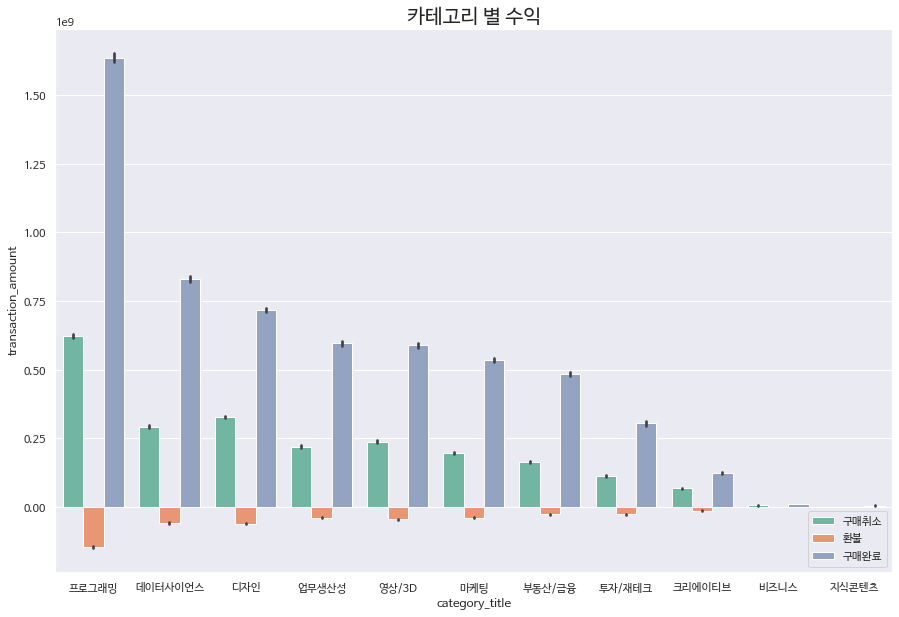

In [ ]:
# transaction sum()
order = ['프로그래밍', '데이터사이언스','디자인','업무생산성', '영상/3D', '마케팅', '부동산/금융', '투자/재테크', '크리에이티브','비즈니스', '지식콘텐츠']
plt.figure(figsize=(15,10))
plt.title('카테고리 별 수익', fontsize=20)
sns.set_palette("Set2")
ax1 = sns.barplot(data=ALL1,order=order, x='category_title', y='transaction_amount',estimator=np.sum, hue=ALL1[['type', 'state']].apply(tuple, axis=1),  hue_order=[('PAYMENT', 'CANCELLED'), ('REFUND','COMPLETED'),('PAYMENT','COMPLETED')])

legend_list = ['구매취소', '환불', '구매완료']
plt.legend()
for i in range(3):
    ax1.legend_.texts[i].set_text(legend_list[i])

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


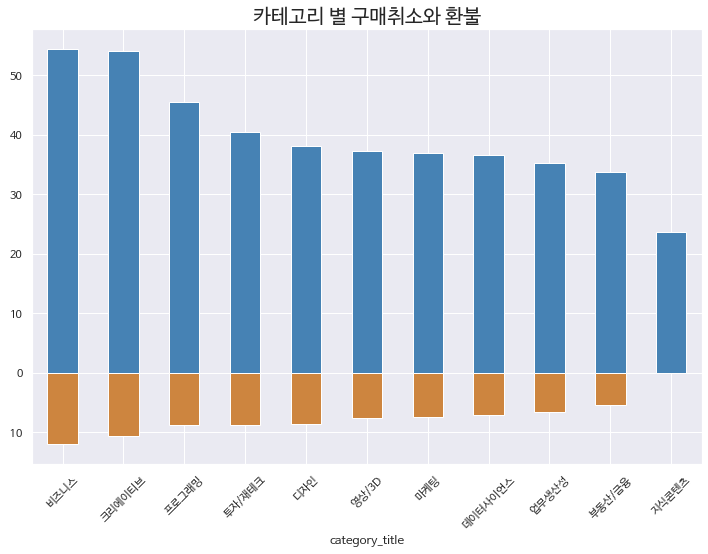

category_title
비즈니스       54.456459
크리에이티브     54.154076
디자인        45.590473
영상/3D      40.478650
프로그래밍      38.138270
투자/재테크     37.202864
업무생산성      36.871687
마케팅        36.525726
데이터사이언스    35.259395
부동산/금융     33.725393
지식콘텐츠      23.641851
Name: transaction_amount, dtype: float64 category_title
비즈니스      -12.032965
크리에이티브    -10.732516
프로그래밍      -8.859930
투자/재테크     -8.813999
디자인        -8.578609
영상/3D      -7.644416
마케팅        -7.423782
데이터사이언스    -7.119985
업무생산성      -6.644126
부동산/금융     -5.374188
지식콘텐츠            NaN
Name: transaction_amount, dtype: float64


In [ ]:
# 구매완료 내역 대비, 구매취소 와 환불 금액 비율 (%)
fig, aq= plt.subplots(figsize=(12,8))
plt.title('카테고리 별 구매취소와 환불', fontsize=20)

# 구매취소
cp = ((TC.groupby('category_title').sum()['transaction_amount'] / TP.groupby('category_title').sum()['transaction_amount'])* 100).sort_values(ascending=False)
cp.plot.bar(ax=aq, color='steelblue')

# 환불
rp = ((TR.groupby('category_title').sum()['transaction_amount'] / TP.groupby('category_title').sum()['transaction_amount'])* 100).sort_values(ascending=True)
rp.plot.bar(ax=aq, color='peru')

plt.xticks(rotation=45)
plt.show()
print(cp,rp)

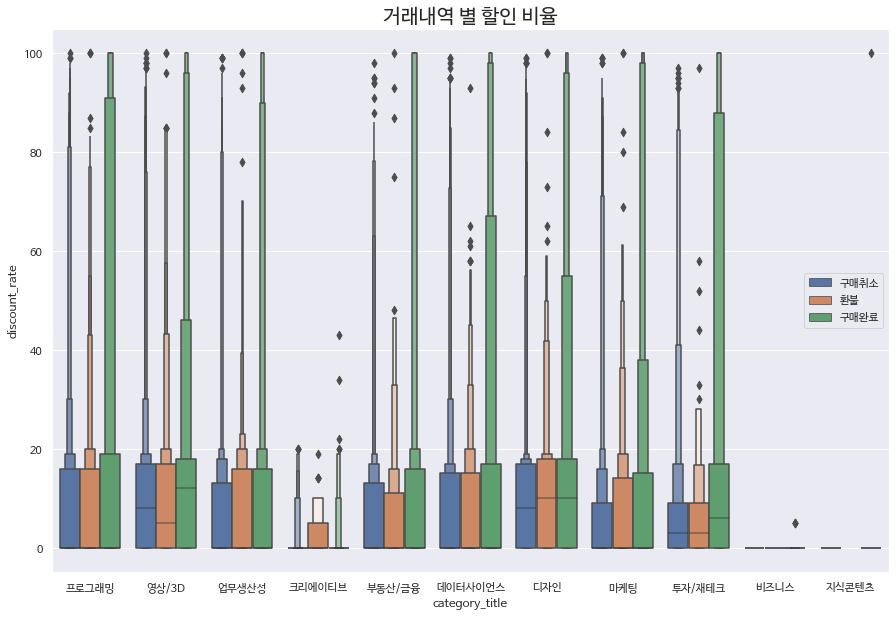

In [ ]:
# 할인 비율과 구매의사결정 상관관계
ALL1['discount_rate'] = round(ALL1['coupon_discount_amount']/ALL1['sale_price']*100)
ALL1.discount_rate[ALL1.discount_rate > 100] = 100
egend_list = ['구매취소', '환불', '구매완료']
plt.figure(figsize=(15,10))
plt.title('거래내역 별 할인 비율', fontsize=20)
sns.set_palette("deep")
ax2 = sns.boxenplot(data=ALL1, x='category_title', y='discount_rate', hue=ALL1[['type', 'state']].apply(tuple, axis=1),hue_order=[('PAYMENT', 'CANCELLED'), ('REFUND','COMPLETED'),('PAYMENT','COMPLETED')])

for i in range(3):
    ax2.legend_.texts[i].set_text(legend_list[i])

plt.show()

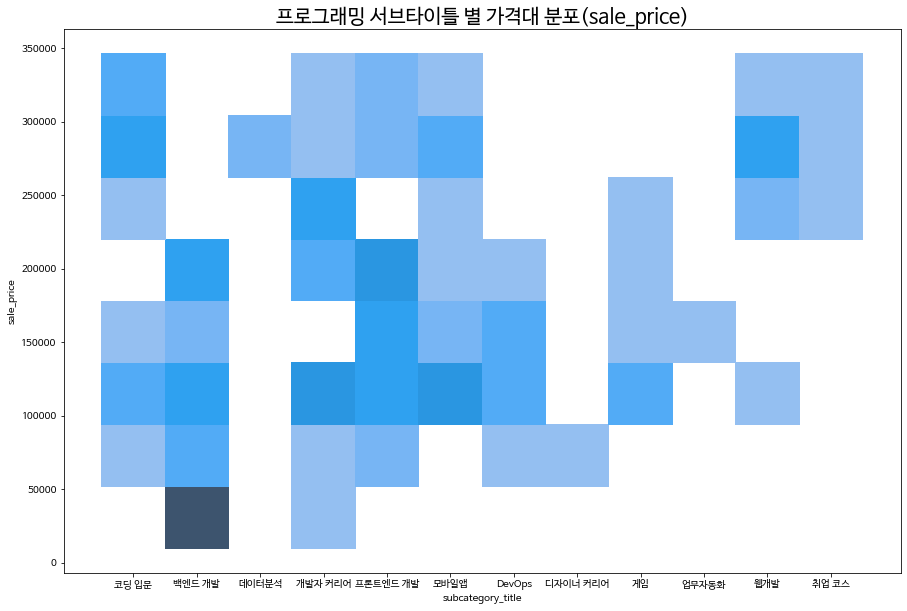

In [ ]:
# groupby mean()으로 간략히, 각 course_title별 평균값에 따른 가격 분포도

# sale_price 기준
plt.figure(figsize=(15,10))
plt.title('프로그래밍 서브타이틀 별 가격대 분포(sale_price)', fontsize=20)
sns.histplot(ALL1[ALL1.category_title=='프로그래밍'].groupby(['course_title','subcategory_title']).median(), x='subcategory_title', y='sale_price')
plt.show()

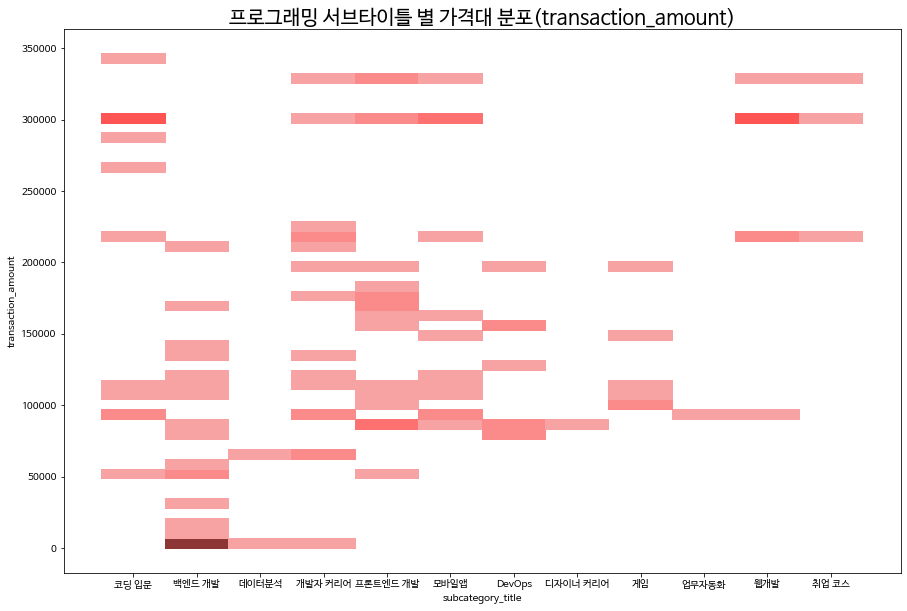

In [ ]:
# transacion_amount 기준

ALL3 = rs3[rs3.id.isin(tpl+tcl+trl)==True]  # ALL3
ALL3.type[ALL3.id.isin(list(to.id))==True] = 'PAYMENT'
ALL3.transaction_amount[ALL3.transaction_amount < 0 ] = -ALL3.transaction_amount # refund 음수 -> 양수

plt.figure(figsize=(15,10))
plt.title('프로그래밍 서브타이틀 별 가격대 분포(transaction_amount)', fontsize=20)
sns.histplot(data = ALL3[ALL3.category_title=='프로그래밍'].groupby(['course_title','subcategory_title']).mean(), x='subcategory_title', y='transaction_amount',color='R',bins=50)
plt.show()

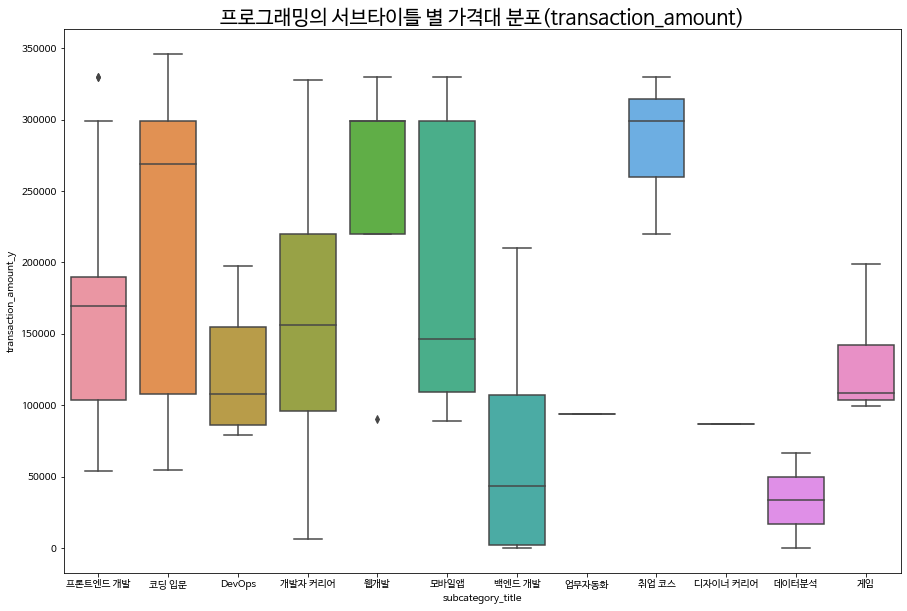

In [ ]:
# 중복된 course_title을 제거하고, transaction_amount평균 값으로 새로운 칼럼을 만들어 기입

# transaction_amount 기준

ALL4 = ALL3.drop_duplicates(['course_title'], keep='last').copy() # course_title  중복제거
lol = ALL3.groupby('course_title')['transaction_amount'].mean() # course_title 별 평균값
lol2 = pd.merge(ALL4,lol, how='left', left_on='course_title', right_index=True) # course_title별 평균값 기입

plt.figure(figsize=(15,10))
plt.title('프로그래밍의 서브타이틀 별 가격대 분포(transaction_amount)', fontsize=20)
sns.boxplot(data=lol2[lol2.category_title=='프로그래밍'], x='subcategory_title', y='transaction_amount_y')
plt.show()

## 손실분석 팀의 공통 취합
- 분석 내용을 취합하여 고객의 구매의사를 분석함
- 취합된 내용으로 손실의 주된원인을 파악함


### How to?  
1. 카테고리별 구매취소, 환불, 구매완료를 분석하여 주된 손실 내역을 도출함
2. 상품 구매를 확정하는데, 가격대와 기간대, 할인여부와 할인의 정도와의 영향을 분석함 

In [ ]:
ra = rs.copy()

# 취합

## 카테고리 별로 분류하여 매출액과 손실액을 파악하고자 함

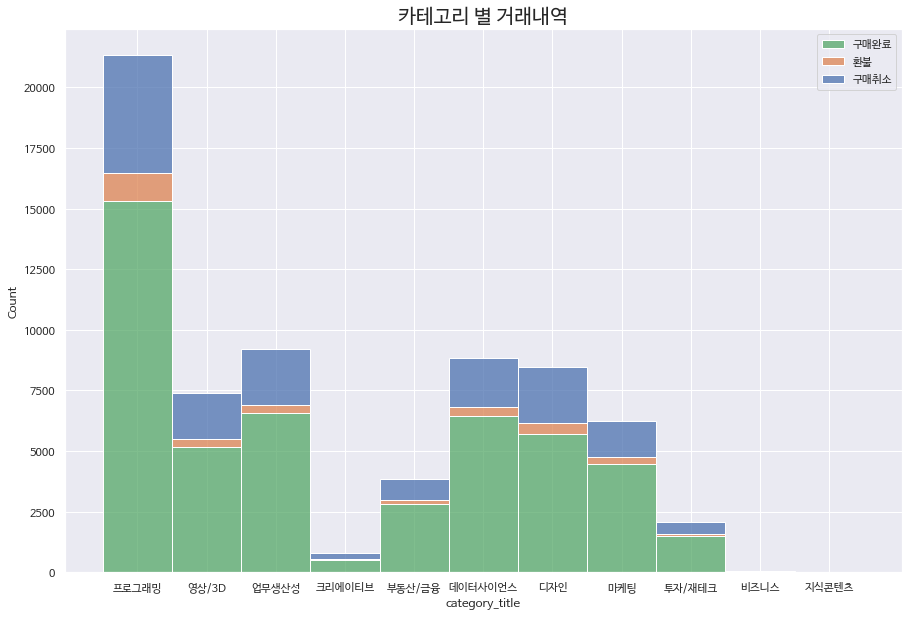

In [ ]:
# 카테고리별 거래내역 건 수 ⟶ 

plt.figure(figsize=(15,10))
plt.title('카테고리 별 거래내역', fontsize=20)
sns.set_palette("deep")
sns.histplot(data=ALL1, x='category_title', hue=ALL1[['type', 'state']].apply(tuple, axis=1), hue_order=[('PAYMENT', 'CANCELLED'), ('REFUND','COMPLETED'),('PAYMENT','COMPLETED')], multiple='stack')
plt.legend(labels=['구매완료', '환불', '구매취소'])
plt.show()           

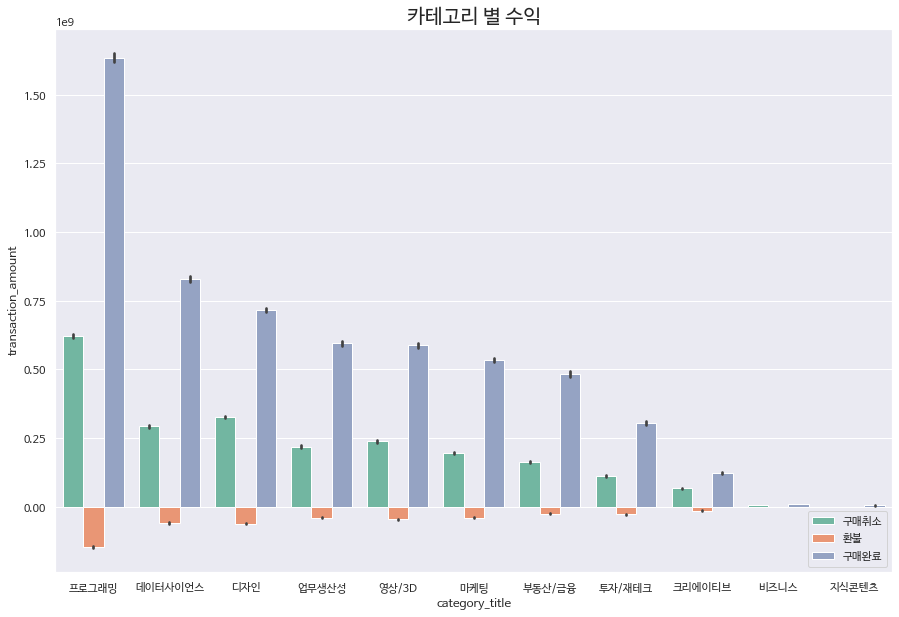

In [ ]:
# 추가적으로 나아가 카테고리 별 매출액을 파악하였음.
order = ['프로그래밍', '데이터사이언스','디자인','업무생산성', '영상/3D', '마케팅', '부동산/금융', '투자/재테크', '크리에이티브','비즈니스', '지식콘텐츠']
plt.figure(figsize=(15,10))
plt.title('카테고리 별 수익', fontsize=20)
sns.set_palette("Set2")
ax1 = sns.barplot(data=ALL1,order=order, x='category_title', y='transaction_amount',estimator=np.sum, hue=ALL1[['type', 'state']].apply(tuple, axis=1),  hue_order=[('PAYMENT', 'CANCELLED'), ('REFUND','COMPLETED'),('PAYMENT','COMPLETED')])

legend_list = ['구매취소', '환불', '구매완료']
plt.legend()
for i in range(3):
    ax1.legend_.texts[i].set_text(legend_list[i])

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


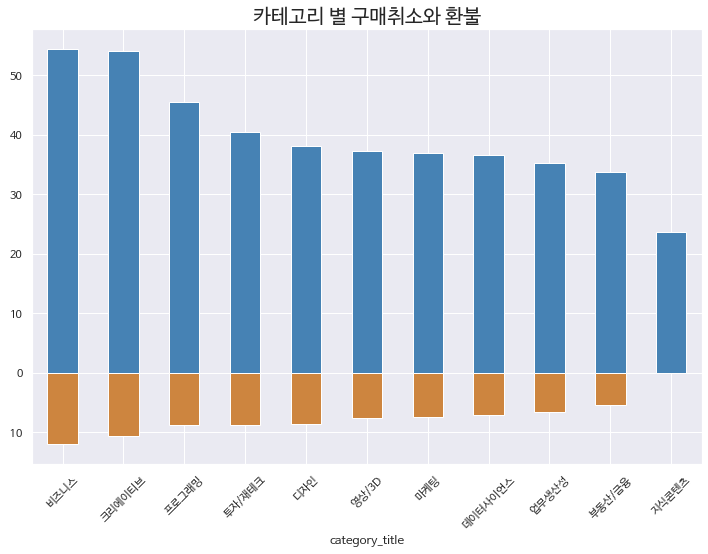

category_title
비즈니스       54.456459
크리에이티브     54.154076
디자인        45.590473
영상/3D      40.478650
프로그래밍      38.138270
투자/재테크     37.202864
업무생산성      36.871687
마케팅        36.525726
데이터사이언스    35.259395
부동산/금융     33.725393
지식콘텐츠      23.641851
Name: transaction_amount, dtype: float64 category_title
비즈니스      -12.032965
크리에이티브    -10.732516
프로그래밍      -8.859930
투자/재테크     -8.813999
디자인        -8.578609
영상/3D      -7.644416
마케팅        -7.423782
데이터사이언스    -7.119985
업무생산성      -6.644126
부동산/금융     -5.374188
지식콘텐츠            NaN
Name: transaction_amount, dtype: float64


In [ ]:
# 그러면 비율 어떨까?  환불과 구매취소가 저렇게 나왔는데 카테고리 별로 수익의 비율이 어떨까?란 생각이 들었다. 
# 따라서, 구매완료 내역 대비, 구매취소 와 환불 금액 비율 (%) 파악함. 환불한 사람 제일 높은건 12% 구매취소는 대략적으로 제일 높은건 54%(그래프 밑 수치보면 % 나와있음)
fig, aq= plt.subplots(figsize=(12,8))
plt.title('카테고리 별 구매취소와 환불', fontsize=20)

# 구매취소
cp = ((TC.groupby('category_title').sum()['transaction_amount'] / TP.groupby('category_title').sum()['transaction_amount'])* 100).sort_values(ascending=False)
cp.plot.bar(ax=aq, color='steelblue')
# 환불
rp = ((TR.groupby('category_title').sum()['transaction_amount'] / TP.groupby('category_title').sum()['transaction_amount'])* 100).sort_values(ascending=True)
rp.plot.bar(ax=aq, color='peru')

plt.xticks(rotation=45)
plt.show()
print(cp,rp)

In [ ]:
ay = tcl + trl
ALL2 = ra[ra.id.isin(ay)==True]  # ALL
ALL2.type[ALL2.id.isin(list(to.id))==True] = 'PAYMENT'

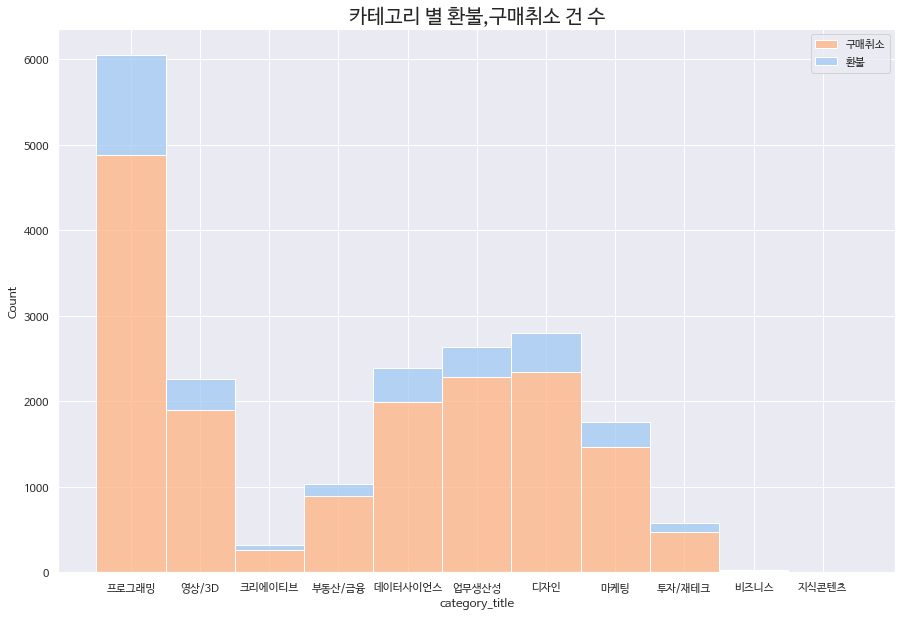

In [ ]:
# 위에서 살펴보았지만 카테고리 별로 건 수를 따졌을 땐 비즈니스와 크리에이티브를 제외하면 프로그래밍이 제일 높다. 전체 통계 ⟶ 카테고리별 type 중 REFUND, PAYMENT_CANCELLED 비교

plt.figure(figsize=(15,10))
plt.title('카테고리 별 환불,구매취소 건 수', fontsize=20)
sns.histplot(data=ALL2, x='category_title',hue=ALL2[['type', 'state']].apply(tuple, axis=1), hue_order= [('REFUND','COMPLETED'),('PAYMENT','CANCELLED')], multiple='stack',palette='pastel')
plt.legend(labels = ['구매취소','환불'])

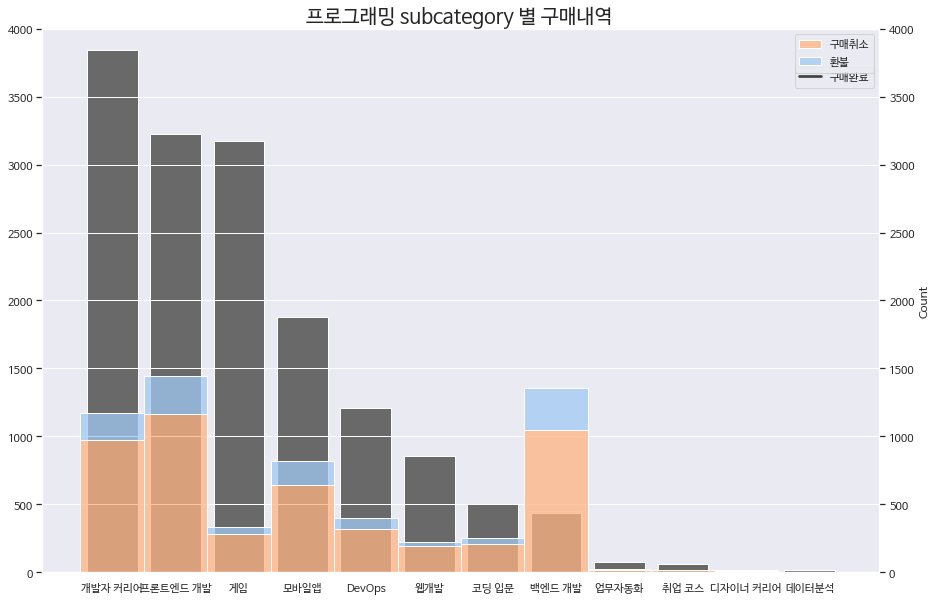

In [ ]:
# 그래프 그리기 따라서 프로그래밍의 서브 카테고리 별 구매내역을 살펴보았다. * 백엔드 개발의 수치를 주의깊게 볼 필요가 있다. - 백엔드 개발의 수치가 과연 쿠폰 할인율과 연관이 있을까란 생각에 밑의 그래프를 그림
R = TP.subcategory_title[TP.category_title=='프로그래밍']
fig, ax1 = plt.subplots(figsize=(15,10))
plt.title('프로그래밍 subcategory 별 구매내역 ', fontsize=20)


sns.barplot(color='dimgray',data=R, x=R.value_counts().index, y=R.value_counts().values, ax = ax1)
ax1.set_ylim(0, 4000)
plt.legend(labels = ['구매완료'],bbox_to_anchor=(1.0,0.94))

ax2 = ax1.twinx()
sns.histplot(data=ALL2[ALL2.category_title=='프로그래밍'],x='subcategory_title', hue=ALL2[['type', 'state']].apply(tuple, axis=1),hue_order= [('REFUND','COMPLETED'),('PAYMENT','CANCELLED')],multiple='stack',ax = ax2,palette= 'pastel')
ax2.set_ylim(0, 4000)
plt.legend(labels = ['구매취소','환불','구매완료'])


plt.show()

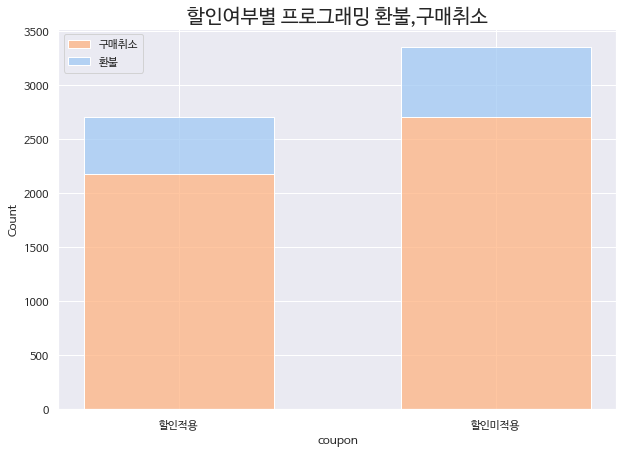

In [ ]:
# 구매취소,환불이 할인여부와 상관관계가 있을거란 생각에 비교하고자함. 따라서 프로그래밍 할인 여부에 따른 REFUND,PAYMENT_CANCELLED 비교를 해보았다. 
# 구매 취소와 환불의 경우 할인 적용된 상품보다 할인 미적용 상품이 더 많았다.
ALL2['coupon'] = 'x'
ALL2.coupon[ALL2.coupon_discount_amount == 0 ]= '할인미적용'
ALL2.coupon[ALL2.coupon_discount_amount > 0 ] = '할인적용'
plt.figure(figsize=(10,7))#.add_subplot(2,2,2)
plt.title('할인여부별 프로그래밍 환불,구매취소', fontsize=20)
sns.histplot(data=ALL2[ALL2.category_title=='프로그래밍'],x = 'coupon', hue=ALL2[['type', 'state']].apply(tuple, axis=1),hue_order= [('REFUND','COMPLETED'),('PAYMENT','CANCELLED')],multiple = 'stack',shrink = 0.6, palette='pastel')
plt.legend(labels = ['구매취소','환불'])

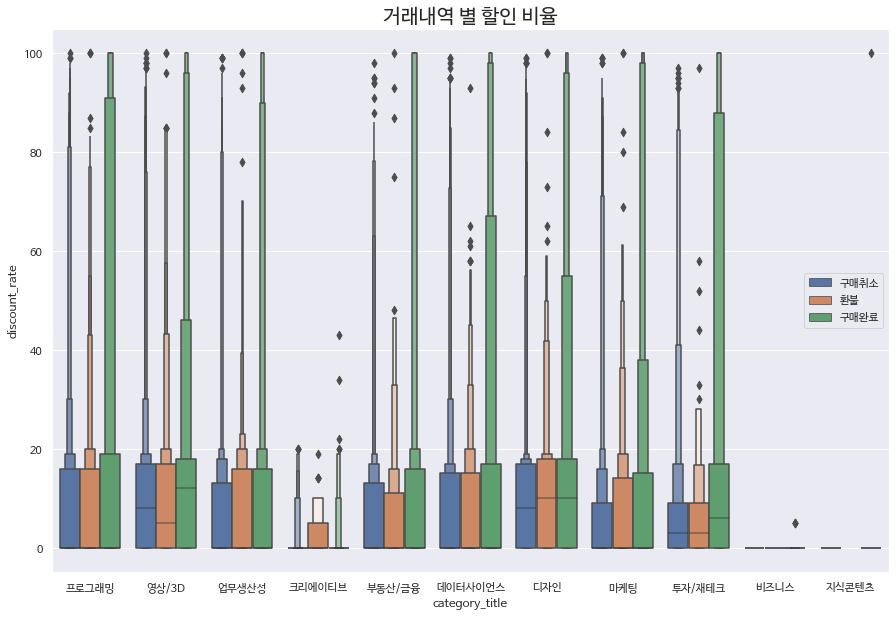

In [ ]:
# 그래서 카테고리 전체의 할인 여부에 따른 구매취소, 환불, 구매완료 여부를 파악함
# 할인 여부는 구매에 큰 영향을 미치지 않아, 할인 비율과의 상관관계를 파악함
# 할인 비율이 높은 상품일수록 구매취소와 환불한 경우보다 구매완료한 경우가 많았다.
ALL1['discount_rate'] = round(ALL1['coupon_discount_amount']/ALL1['sale_price']*100)
ALL1.discount_rate[ALL1.discount_rate > 100] = 100
egend_list = ['구매취소', '환불', '구매완료']
plt.figure(figsize=(15,10))
plt.title('거래내역 별 할인 비율', fontsize=20)
sns.set_palette("deep")
ax2 = sns.boxenplot(data=ALL1, x='category_title', y='discount_rate', hue=ALL1[['type', 'state']].apply(tuple, axis=1),hue_order=[('PAYMENT', 'CANCELLED'), ('REFUND','COMPLETED'),('PAYMENT','COMPLETED')])

for i in range(3):
    ax2.legend_.texts[i].set_text(legend_list[i])

plt.show()

## 소결

구매취소와 환불된 상품들보다 구매완료된 상품들의 할인비율이 더 높은 것을 알 수 있었다.
할인 적용의 여부와 할인 비율이 구매결정에 영향을 주는것으로 나타났다.



나아가 구매취소보다 고객의 구매 거부 의사가 강한 환불 데이터를 가격과 카테고리별, 구매 시점으로 분석해봄

Text(0.5, 0, '가격대')

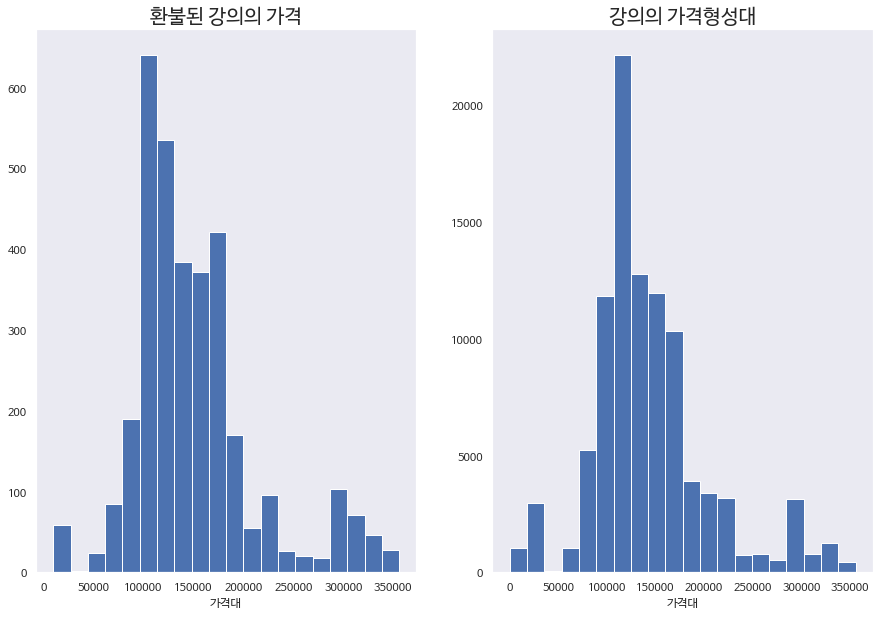

In [ ]:
# 환불된 강의의 가격과 구매완료된 전체 강의의 가격대를 비교했음
# 강의의 평균적인 가격대 보다 저렴한 강의가 환불된 경우가 많은 것으로 나타났다. 
plt
plt.subplots(1,2, figsize=(15,10))

plt.subplot(1, 2, 1)
ra.sale_price[ra.type=='REFUND'].hist(bins=20)
plt.grid(False)
plt.title('환불된 강의의 가격',fontsize = 20)
plt.xlabel('가격대')


plt.subplot(1, 2, 2)
ra.sale_price.hist(bins=20)
plt.grid(False)
plt.title('강의의 가격형성대',fontsize = 20)
plt.xlabel('가격대')


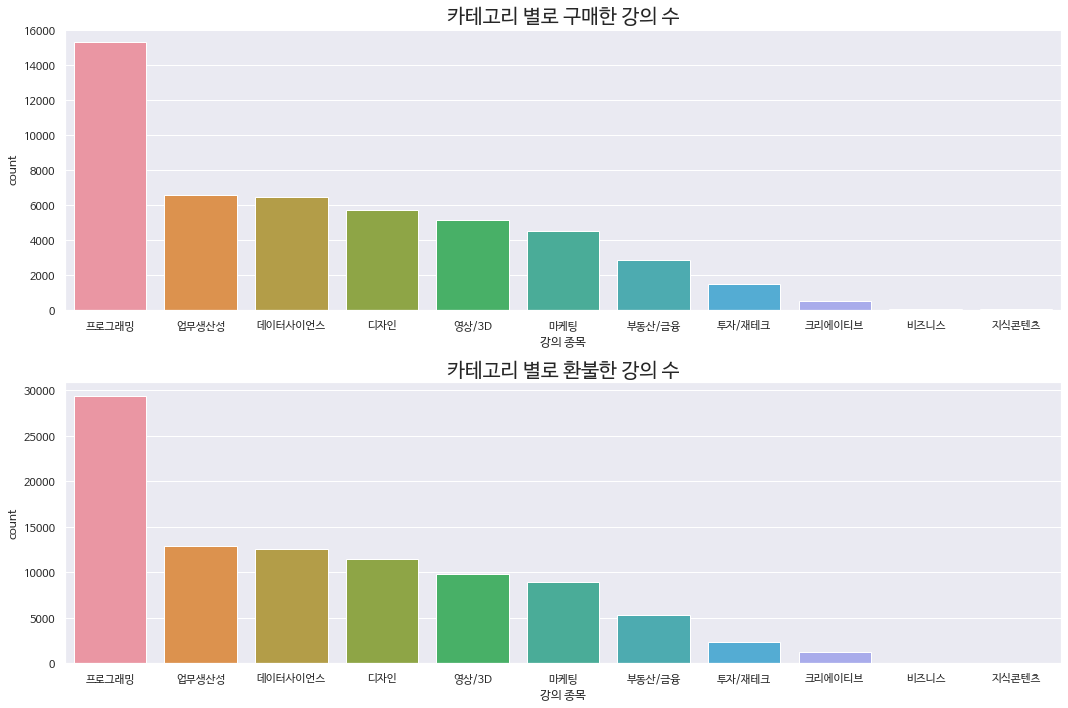

In [ ]:
# 카테고리 별로도 확인해보았다. 
plt.subplots(2, figsize=(15,10))

plt.subplot(2, 1,1)
s = sns.countplot(x= ra.category_title[(ra.type == 'PAYMENT')&(ra.state =='COMPLETED')], data=ra, order = ra['category_title'].value_counts().index)
s.set_title("카테고리 별로 구매한 강의 수",fontsize = 20)
plt.xlabel("강의 종목")

plt.subplot(2, 1,2)
s1 = sns.countplot(x= ra.category_title[ra.type!='REFUND'], data=ra, order = ra['category_title'].value_counts().index)
s1.set_title("카테고리 별로 환불한 강의 수",fontsize = 20)
plt.xlabel("강의 종목")

plt.tight_layout()

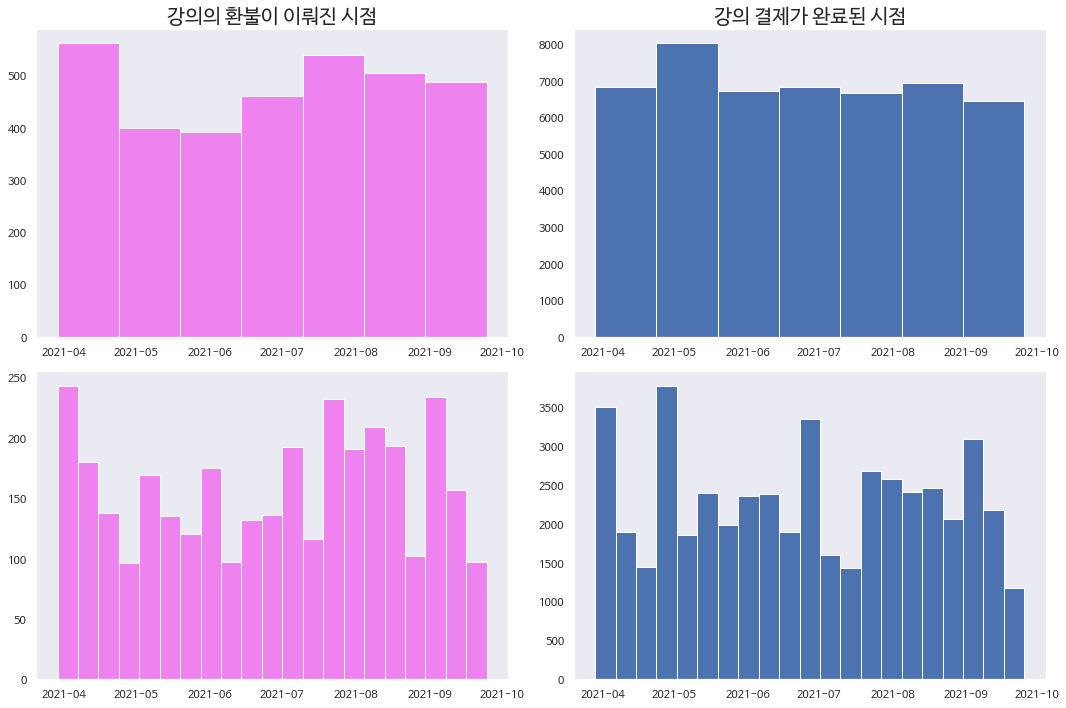

In [ ]:
# 강의가 환불된 시점과 결제가 완료된 시점을 비교해보았다. 
# 월초에 환불과 결제가 제일 많이 이뤄졌다.  
# 빈도수를 월 초,월 말로 더 구분해봤을 때 구매와 환불의 패턴이 유사하게 나타났다. 
plt.subplots(2,2,figsize=(15,10))

plt.subplot(2, 2,1)
ra.completed_at[ra.type=='REFUND'].hist(bins=7, color = 'violet')
plt.grid(False)
plt.title('강의의 환불이 이뤄진 시점',fontsize = 20)

plt.subplot(2, 2,2)
ra.completed_at[(ra.type == 'PAYMENT')&(ra.state =='COMPLETED')].hist(bins=7)
plt.grid(False)
plt.title('강의 결제가 완료된 시점',fontsize = 20)

plt.subplot(2, 2,3)
ra.completed_at[ra.type=='REFUND'].hist(bins=21, color = 'violet')
plt.grid(False)
#plt.title('강의의 환불이 이뤄진 시점',fontsize = 20)

plt.subplot(2, 2,4)
ra.completed_at[(ra.type == 'PAYMENT')&(ra.state =='COMPLETED')].hist(bins=21)
plt.grid(False)
#plt.title('결제완료된 강의들의 결제 시점',fontsize = 20)
  
plt.tight_layout()

## 결론
고객의 환불 결정에 가격이 영향을 끼친 것으로 보인다.

1. 구매시점과 환불이 근시일 내에 일어난다.
패스트캠퍼스 환불규정에 따르면 환불 금액 비율이 수강 기간에 따라 정해져있기때문에 기간에 따라 환불 기간이 달라진 것으로 판단된다. 환불 사유에 대해서는 개인사정, 강의 만족도, 의지 부족 등의 이유들로 환불을 하는 것으로 예상되지만, 이에 대해서 구체적인 데이터가 없기 때문에 추후  패스트캠퍼스가 환불 전 설문조사를 통해 환불의 원인을 제대로 파악한다면 손실을 더 줄일 수 있을거라 생각한다.    

2. 환불된 강의의 가격이 평균적인 가격보다 싸다.
이러한 점으로 보아, 다른 과목들보다 가격이 상대적으로 저렴해서 구매했지만 모종의 이유들로 환불했을 것이다.  
이런 강의들은 미끼상품이라 생각한다.  
따라서, 가격이 저렴한 강의 경우 고객들은 쉽게 구매하고 쉽게 환불한 것으로 추측해본다.  
이에 대한 해결방안으로 비교적 가격 높은 강의는 환불이 낮다. 낮은 강의는 접근하기 쉬운 입문 과목들이고, 가격이 높은 강의는 기본적인 수준 이상의 강의일거다. 따라서 입문 강의에 대해 좀 더 보완할 필요가 있다. 
